In [1]:
%matplotlib inline
import pyllama
import numpy
import matplotlib.pyplot as plt
from scipy import stats

In [28]:
data=numpy.loadtxt("Au207_R.txt")

In [18]:
data=numpy.loadtxt("Au325_R.txt")

In [2]:
data=numpy.loadtxt("Au486_R.txt")

In [29]:
angle=data[:,0]

In [30]:
R=data[:,1]

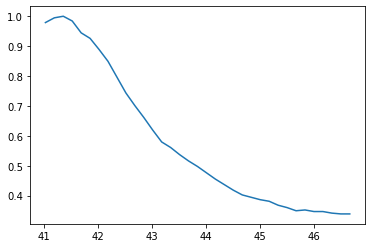

In [31]:
plt.plot(angle, R)

# Una capa simulada y experimental

C:\Users\alfre\AppData\Local\Temp/ipykernel_24784/2874059565.py:24: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))


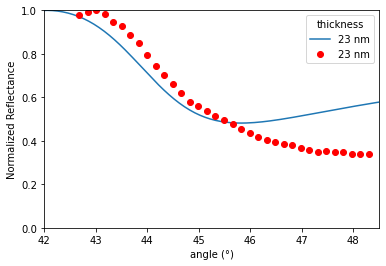

In [32]:
n_entry=1.5
n_exit=1.00
theta_in_deg_list = numpy.linspace(40,50,200)
epsilon = numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])
epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])

thickness_nm=23
reflection_p_to_p = []
wl_nm=633
for theta_in_deg in theta_in_deg_list:
        # Calculation of the wavevector
    theta_in_rad=theta_in_deg*numpy.pi/180
    k0 = 2 * numpy.pi / wl_nm
    Kx = n_entry * numpy.sin(theta_in_rad)
    Ky = 0
    Kz_entry = n_entry * numpy.cos(theta_in_rad)
    theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
    Kz_exit = n_exit * numpy.cos(theta_out_rad)
    Kz = n_entry * numpy.cos(theta_in_rad)
    

        # Creation of the entry and exit half-spaces and of the two layers
    entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
    exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
    my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
    my_layer = pyllama.Layer(epsilon, thickness_nm, Kx, k0)
    my_stack_structure.add_layer(my_layer)

        # Calculation of the reflectance and storage
    J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
    reflection_p_to_p.append(J_refl_lin[0, 0])
reflection=reflection_p_to_p/max(reflection_p_to_p)
    # Plotting
plt.plot(theta_in_deg_list, reflection, label='{} nm'.format(thickness_nm))
plt.plot(angle+1.65, R,'ro' , label='{} nm'.format(thickness_nm))
plt.ylabel('Normalized Reflectance')
plt.xlabel('angle (°)')
plt.ylim(0,1)
plt.xlim(42,48.5)
    #plt.xticks(numpy.arange(40, 51, step=1))
    #plt.xticks(numpy.arange(43, 47, step=0.5))
plt.legend(title="thickness")
plt.savefig("espesores.jpg",dpi=300)

# Una capa

C:\Users\alfre\AppData\Local\Temp/ipykernel_24424/3169353480.py:24: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))


(0.0, 1.0)

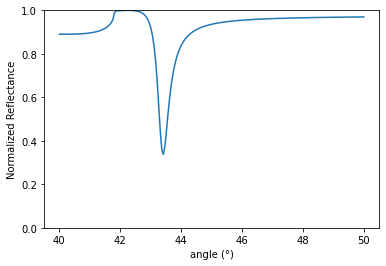

In [35]:
n_entry=1.5
n_exit=1.00
theta_in_deg_list = numpy.linspace(40,50,200)
epsilon = numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])
epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])

thickness_nm=38
reflection_p_to_p = []
wl_nm=633
for theta_in_deg in theta_in_deg_list:
        # Calculation of the wavevector
    theta_in_rad=theta_in_deg*numpy.pi/180
    k0 = 2 * numpy.pi / wl_nm
    Kx = n_entry * numpy.sin(theta_in_rad)
    Ky = 0
    Kz_entry = n_entry * numpy.cos(theta_in_rad)
    theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
    Kz_exit = n_exit * numpy.cos(theta_out_rad)
    Kz = n_entry * numpy.cos(theta_in_rad)
    

        # Creation of the entry and exit half-spaces and of the two layers
    entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
    exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
    my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
    my_layer = pyllama.Layer(epsilon, thickness_nm, Kx, k0)
    my_stack_structure.add_layer(my_layer)

        # Calculation of the reflectance and storage
    J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
    reflection_p_to_p.append(J_refl_lin[0, 0])
reflection=reflection_p_to_p/max(reflection_p_to_p)
    # Plotting
plt.plot(theta_in_deg_list, reflection, label='{} nm'.format(thickness_nm))
plt.ylabel('Normalized Reflectance')
plt.xlabel('angle (°)')
plt.ylim(0,1)
#plt.xlim(42,48.5)
    #plt.xticks(numpy.arange(40, 51, step=1))
    #plt.xticks(numpy.arange(43, 47, step=0.5))
#plt.legend(title="thickness")
#plt.savefig("espesores.jpg",dpi=300)

# Una de oro variando espesores

C:\Users\alfre\AppData\Local\Temp/ipykernel_2380/286656824.py:26: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_2380/286656824.py:26: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_2380/286656824.py:26: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_2380/286656824.py:26: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_2380/286656824.py:26: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_2

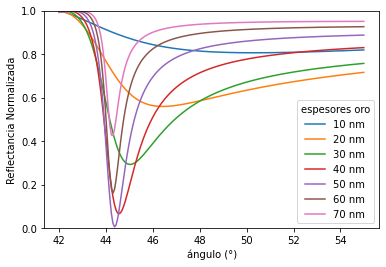

In [7]:
n_entry=1.5
n_exit=1.00
theta_in_deg_list = numpy.linspace(42,55,200)
epsilon = numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])
epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])

espesor_nm=numpy.array([10,20,30,40,50,60,70])
reflection_p_to_p = []
wl_nm=633
for thickness_nm in espesor_nm:
    reflection_p_to_p = []    
    for theta_in_deg in theta_in_deg_list:
        # Calculation of the wavevector
        theta_in_rad=theta_in_deg*numpy.pi/180
        k0 = 2 * numpy.pi / wl_nm
        Kx = n_entry * numpy.sin(theta_in_rad)
        Ky = 0
        Kz_entry = n_entry * numpy.cos(theta_in_rad)
        theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
        Kz_exit = n_exit * numpy.cos(theta_out_rad)
        Kz = n_entry * numpy.cos(theta_in_rad)
    

        # Creation of the entry and exit half-spaces and of the two layers
        entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
        exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
        my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
        my_layer = pyllama.Layer(epsilon, thickness_nm, Kx, k0)
        my_stack_structure.add_layer(my_layer)

        # Calculation of the reflectance and storage
        J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
        reflection_p_to_p.append(J_refl_lin[0, 0])
    reflection=reflection_p_to_p/max(reflection_p_to_p)
    # Plotting
    plt.plot(theta_in_deg_list, reflection, label='{} nm'.format(thickness_nm))
    plt.ylabel('Reflectancia Normalizada')
    plt.xlabel('ángulo (°)')
    plt.ylim(0,1)
    #plt.xlim(42,47.5)
    #plt.xticks(numpy.arange(42, 47.5, step=0.5))
    #plt.xticks(numpy.arange(43, 47, step=0.5))
    plt.legend(title="espesores oro")
    plt.savefig("oro_espesores.jpg",dpi=300)

# Una de plata variando espesores

C:\Users\alfre\AppData\Local\Temp/ipykernel_2380/2471758152.py:26: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_2380/2471758152.py:26: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_2380/2471758152.py:26: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_2380/2471758152.py:26: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_2380/2471758152.py:26: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipyker

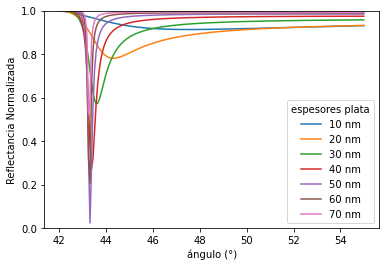

In [6]:
n_entry=1.5
n_exit=1.00
theta_in_deg_list = numpy.linspace(42,55,200)
epsilon = numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])
epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])

espesor_nm=numpy.array([10,20,30,40,50,60,70])
reflection_p_to_p = []
wl_nm=633
for thickness_nm in espesor_nm:
    reflection_p_to_p = []    
    for theta_in_deg in theta_in_deg_list:
        # Calculation of the wavevector
        theta_in_rad=theta_in_deg*numpy.pi/180
        k0 = 2 * numpy.pi / wl_nm
        Kx = n_entry * numpy.sin(theta_in_rad)
        Ky = 0
        Kz_entry = n_entry * numpy.cos(theta_in_rad)
        theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
        Kz_exit = n_exit * numpy.cos(theta_out_rad)
        Kz = n_entry * numpy.cos(theta_in_rad)
    

        # Creation of the entry and exit half-spaces and of the two layers
        entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
        exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
        my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
        my_layer = pyllama.Layer(epsilon, thickness_nm, Kx, k0)
        my_stack_structure.add_layer(my_layer)

        # Calculation of the reflectance and storage
        J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
        reflection_p_to_p.append(J_refl_lin[0, 0])
    reflection=reflection_p_to_p/max(reflection_p_to_p)
    # Plotting
    plt.plot(theta_in_deg_list, reflection, label='{} nm'.format(thickness_nm))
    plt.ylabel('Reflectancia Normalizada')
    plt.xlabel('ángulo (°)')
    plt.ylim(0,1)
    #plt.xlim(42,47.5)
    #plt.xticks(numpy.arange(42, 47.5, step=0.5))
    #plt.xticks(numpy.arange(43, 47, step=0.5))
    plt.legend(title="espesores plata")
    plt.savefig("plata_espesores.jpg",dpi=300)

# Dos capas Titanio y Oro

C:\Users\alfre\AppData\Local\Temp/ipykernel_2380/1200241758.py:36: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))


(0.0, 1.0)

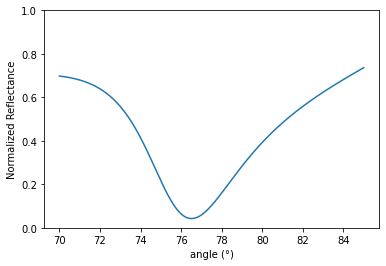

In [37]:
# Creation of an empty variable
n_entry=1.5 #vidrio
n_exit=1.3455 #aire
theta_in_deg_list = numpy.linspace(70,85,1000)
reflection_p_to_p = []
epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])



eps_a=numpy.array([[(-6.917175+20.5254j), 0, 0],
                   [0, (-6.917175+20.5254j), 0],
                   [0, 0, (-6.917175+20.5254j)]])
eps_b=numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])
thick_a=2.5
thick_b=50
N=1

wl_nm=633

# Calculation of the reflectance for each wavelength
for theta_in_deg in theta_in_deg_list:
    theta_in_rad=theta_in_deg*numpy.pi/180
    # Calculation of the wavevector
    
    k0 = 2 * numpy.pi / wl_nm
    Kx = n_entry * numpy.sin(theta_in_rad)
    Ky = 0
    Kz_entry = n_entry * numpy.cos(theta_in_rad)
    theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
    Kz_exit = n_exit * numpy.cos(theta_out_rad)
    Kz = n_entry * numpy.cos(theta_in_rad)
    
    # Creation of the entry and exit half-spaces and of the two layers
    entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
    exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
    layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
    layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

    # Creation of the periodic stack
    my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
    my_stack_structure.add_layers([layer_a, layer_b])
    my_stack_structure.N_periods = N

    # Calculation of the reflectance and storage
    J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
    reflection_p_to_p.append(J_refl_lin[0, 0])
    #reflection=reflection_p_to_p/max(reflection_p_to_p)

# Plotting
plt.plot(theta_in_deg_list, reflection_p_to_p)
plt.ylabel('Normalized Reflectance')
plt.xlabel('angle (°)')
plt.ylim(0,1)
#plt.xlim(40,50)

In [38]:
numpy.savetxt('leche_pura_H2O_20.txt', reflection_p_to_p)

In [20]:
numpy.savetxt('ángulo_leche.txt', theta_in_deg_list)

In [21]:
numpy.where( reflection_p_to_p == numpy.amin(reflection_p_to_p))

(array([87], dtype=int64),)

In [22]:
theta_in_deg_list[87]

44.37185929648241

In [23]:
reflection_p_to_p[87]

0.030648756616806994

In [24]:
min(reflection_p_to_p)

0.030648756616806994

In [139]:
# Example data
arr_x = theta_in_deg_list
arr_y = numpy.array(reflection_p_to_p)

# Effective code
difference = max(arr_y) - min(arr_y)
HM = difference / 2

pos_extremum = arr_y.argmin()  # or in your case: arr_y.argmin()
if all((arr_y[pos_extremum:-1] - HM) < 0):
    FWHM=1000
else:
    nearest_above = (numpy.abs(arr_y[pos_extremum:-1] - HM)).argmin()
    nearest_below = (numpy.abs(arr_y[0:pos_extremum] - HM)).argmin()

    FWHM = (numpy.mean(arr_x[nearest_above + pos_extremum]) - numpy.mean(arr_x[nearest_below]))

In [140]:
FWHM

1000

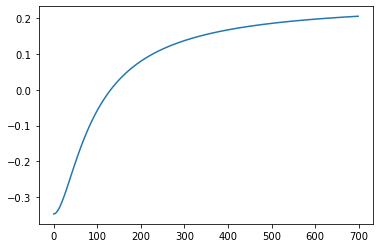

In [135]:
plt.plot(arr_y[pos_extremum:-1] - HM)

In [88]:
x=[0,1,2,3,4,5,6,7,8]
y=[0,1,4,9,16,25,36,49,64]

In [101]:
y[5]=None

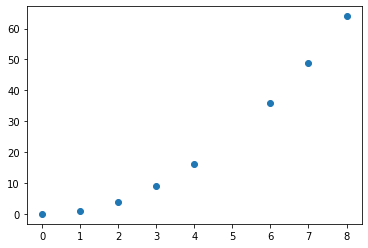

In [102]:
plt.plot(x,y,'o')

# Dos capas variando espesor oro arriba

C:\Users\alfre\AppData\Local\Temp/ipykernel_20412/2255474245.py:41: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_20412/2255474245.py:41: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_20412/2255474245.py:41: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_20412/2255474245.py:41: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_20412/2255474245.py:41: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

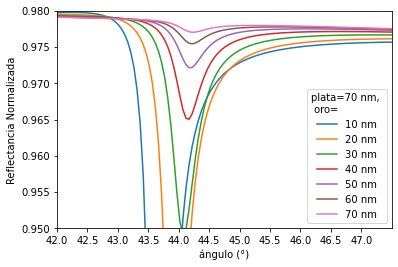

In [9]:
# Creation of an empty variable
n_entry=1.5
n_exit=1.00
theta_in_deg_list = numpy.linspace(40,50,200)
reflection_p_to_p = []
epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])



eps_a=numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])
eps_b=numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])
thick_a=70
espesor_b=numpy.array([10,20,30,40,50,60,70])
reflection_p_to_p = []


N=1

wl_nm=633

# Calculation of the reflectance for each wavelength
for thick_b in espesor_b:
    reflection_p_to_p = []
    for theta_in_deg in theta_in_deg_list:
        theta_in_rad=theta_in_deg*numpy.pi/180
        # Calculation of the wavevector
    
        k0 = 2 * numpy.pi / wl_nm
        Kx = n_entry * numpy.sin(theta_in_rad)
        Ky = 0
        Kz_entry = n_entry * numpy.cos(theta_in_rad)
        theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
        Kz_exit = n_exit * numpy.cos(theta_out_rad)
        Kz = n_entry * numpy.cos(theta_in_rad)
    
        # Creation of the entry and exit half-spaces and of the two layers
        entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
        exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
        layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
        layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

        # Creation of the periodic stack
        my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
        my_stack_structure.add_layers([layer_a, layer_b])
        my_stack_structure.N_periods = N

        # Calculation of the reflectance and storage
        J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
        reflection_p_to_p.append(J_refl_lin[0, 0])
    reflection=reflection_p_to_p/max(reflection_p_to_p)

    # Plotting
    plt.plot(theta_in_deg_list, reflection_p_to_p, label='{} nm'.format(thick_b))
    plt.ylabel('Reflectancia Normalizada')
    plt.xlabel('ángulo (°)')
    plt.ylim(0.95,0.98)
    plt.xlim(42,47.5)
    plt.xticks(numpy.arange(42, 47.5, step=0.5))
    plt.legend(title="plata=70 nm, \n oro=")
    plt.savefig("multicapa_plata70nm.jpg",dpi=300)

# Dos capas variando espesor plata arriba

C:\Users\alfre\AppData\Local\Temp/ipykernel_20412/262331719.py:46: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_20412/262331719.py:46: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_20412/262331719.py:46: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_20412/262331719.py:46: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_20412/262331719.py:46: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipyker

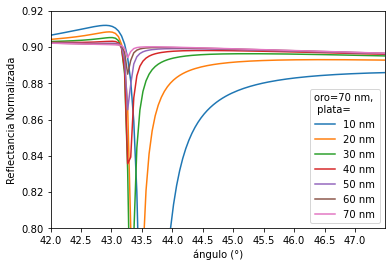

In [5]:
# Creation of an empty variable
n_entry=1.5
n_exit=1.00
theta_in_deg_list = numpy.linspace(40,50,200)
#reflection_p_to_p = []
epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])



eps_a=numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])


eps_b=numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])

thick_a=70
espesor_b=numpy.array([10,20,30,40,50,60,70])
#reflection_p_to_p = []


N=1

wl_nm=633

# Calculation of the reflectance for each wavelength
lista=[]
for thick_b in espesor_b:
    reflection_p_to_p = []
    
    for theta_in_deg in theta_in_deg_list:
        theta_in_rad=theta_in_deg*numpy.pi/180
        # Calculation of the wavevector
    
        k0 = 2 * numpy.pi / wl_nm
        Kx = n_entry * numpy.sin(theta_in_rad)
        Ky = 0
        Kz_entry = n_entry * numpy.cos(theta_in_rad)
        theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
        Kz_exit = n_exit * numpy.cos(theta_out_rad)
        Kz = n_entry * numpy.cos(theta_in_rad)
    
        # Creation of the entry and exit half-spaces and of the two layers
        entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
        exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
        layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
        layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

        # Creation of the periodic stack
        my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
        my_stack_structure.add_layers([layer_a, layer_b])
        my_stack_structure.N_periods = N

        # Calculation of the reflectance and storage
        J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
        reflection_p_to_p.append(J_refl_lin[0, 0])
    reflection=reflection_p_to_p/max(reflection_p_to_p)
    altura=max(reflection_p_to_p)-min(reflection_p_to_p)
    lista.append(altura)

    # Plotting
    plt.plot(theta_in_deg_list, reflection_p_to_p, label='{} nm'.format(thick_b))
    plt.ylabel('Reflectancia Normalizada')
    plt.xlabel('ángulo (°)')
    plt.ylim(0.8,0.92)
    plt.xlim(42,47.5)
    plt.xticks(numpy.arange(42, 47.5, step=0.5))
    plt.legend(title="oro=70 nm, \n plata=")
    plt.savefig("multicapa_oro70nm.jpg",dpi=300)

In [21]:
lista

[0.498881279001843,
 0.4568442278507393,
 0.6751142480355954,
 0.8997931391597832,
 0.8505661104038233,
 0.6724260889383709,
 0.38132391756073325]

# ángulo, mínimo, sensibilidad,  plata (eje y) sobre oro (eje x)

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/355705554.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8

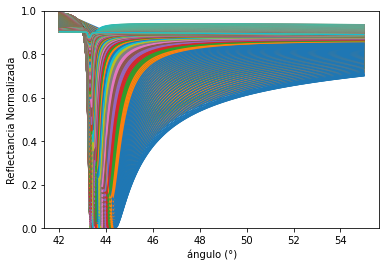

In [91]:
# Creation of an empty variable
n_entry=1.5
n_exit=1.00
theta_in_deg_list = numpy.linspace(42,55,200)
#reflection_p_to_p = []
epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])



eps_a=numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])


eps_b=numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])

#espesor_a=numpy.array([10,20,30,40,50,60,70])
#thick_a=10
#espesor_b=numpy.array([10,20,30,40,50,60,70])
#reflection_p_to_p = []
espesor_a=numpy.arange(10,60,1)
#thick_a=10
espesor_b=numpy.arange(0,60,1)


N=1

wl_nm=633

# Calculation of the reflectance for each wavelength

min_ang=[]
minimo_int=[]
for thick_a in espesor_a:
    
    
    lista=[]
    listaa=[]
    min_ang.append(lista)
    minimo_int.append(listaa)
    for thick_b in espesor_b:
        reflection_p_to_p = []

        for theta_in_deg in theta_in_deg_list:
            theta_in_rad=theta_in_deg*numpy.pi/180
            # Calculation of the wavevector

            k0 = 2 * numpy.pi / wl_nm
            Kx = n_entry * numpy.sin(theta_in_rad)
            Ky = 0
            Kz_entry = n_entry * numpy.cos(theta_in_rad)
            theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
            Kz_exit = n_exit * numpy.cos(theta_out_rad)
            Kz = n_entry * numpy.cos(theta_in_rad)

            # Creation of the entry and exit half-spaces and of the two layers
            entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
            exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
            layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
            layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

            # Creation of the periodic stack
            my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
            my_stack_structure.add_layers([layer_a, layer_b])
            my_stack_structure.N_periods = N

            # Calculation of the reflectance and storage
            J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
            reflection_p_to_p.append(J_refl_lin[0, 0])
        #reflection=reflection_p_to_p/max(reflection_p_to_p)
        minimo=min(reflection_p_to_p)
        angulo=theta_in_deg_list[reflection_p_to_p.index(minimo)]
        listaa.append(minimo)
        lista.append(angulo)

        # Plotting
        plt.plot(theta_in_deg_list, reflection_p_to_p)
        plt.ylabel('Reflectancia Normalizada')
        plt.xlabel('ángulo (°)')
        plt.ylim(0,1)
        #plt.xlim(42,47.5)
        #plt.xticks(numpy.arange(42, 47.5, step=1.0))
        #plt.legend(title="multicapa plata sobre oro \n espesor plata-espesor oro")
        #plt.savefig("multicapa_oro70nm.jpg",dpi=300)

In [92]:
arr_min_ang=numpy.array([min_ang])
arr_min_int=numpy.array([minimo_int])

In [93]:
arr_min_ang.shape

(1, 50, 60)

In [94]:
arr_min_ang2=arr_min_ang.reshape(50,60)
arr_min_int2=arr_min_int.reshape(50,60)

In [95]:
arr_min_ang3=numpy.transpose(arr_min_ang2)
arr_min_int3=numpy.transpose(arr_min_int2)

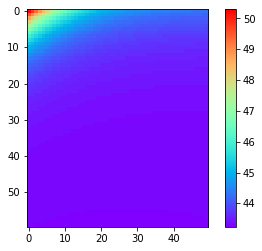

In [96]:
plt.imshow(arr_min_ang3, interpolation='None', cmap='rainbow')
plt.colorbar()
plt.show()

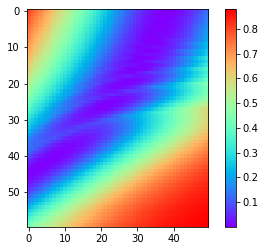

In [97]:
plt.imshow(arr_min_int3, interpolation='None', cmap='rainbow')
plt.colorbar()
plt.show()

In [98]:
numpy.savetxt('theta_min_case1.txt', arr_min_ang2, delimiter=',')

In [99]:
numpy.savetxt('intensidad_min_case1.txt', arr_min_int2, delimiter=',')

### FWHM

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2791555342.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

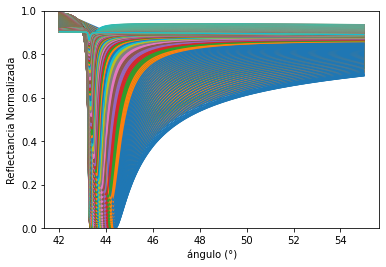

In [74]:
# Creation of an empty variable
n_entry=1.5
n_exit=1.00
theta_in_deg_list = numpy.linspace(42,55,500)
#reflection_p_to_p = []
epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])



eps_a=numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])


eps_b=numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])

#espesor_a=numpy.array([10,20,30,40,50,60,70])
#thick_a=10
#espesor_b=numpy.array([10,20,30,40,50,60,70])
#reflection_p_to_p = []
espesor_a=numpy.arange(10,60,1)
#thick_a=10
espesor_b=numpy.arange(0,60,1)


N=1

wl_nm=633

# Calculation of the reflectance for each wavelength

FWHM=[]
for thick_a in espesor_a:
    
    
    lista=[]
    
    FWHM.append(lista)
    
    for thick_b in espesor_b:
        reflection_p_to_p = []

        for theta_in_deg in theta_in_deg_list:
            theta_in_rad=theta_in_deg*numpy.pi/180
            # Calculation of the wavevector

            k0 = 2 * numpy.pi / wl_nm
            Kx = n_entry * numpy.sin(theta_in_rad)
            Ky = 0
            Kz_entry = n_entry * numpy.cos(theta_in_rad)
            theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
            Kz_exit = n_exit * numpy.cos(theta_out_rad)
            Kz = n_entry * numpy.cos(theta_in_rad)

            # Creation of the entry and exit half-spaces and of the two layers
            entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
            exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
            layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
            layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

            # Creation of the periodic stack
            my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
            my_stack_structure.add_layers([layer_a, layer_b])
            my_stack_structure.N_periods = N

            # Calculation of the reflectance and storage
            J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
            reflection_p_to_p.append(J_refl_lin[0, 0])
        #reflection=reflection_p_to_p/max(reflection_p_to_p)
        
        arr_x = theta_in_deg_list
        arr_y = numpy.array(reflection_p_to_p)
        peaks = numpy.where((arr_y[1:-1] > arr_y[0:-2]) * (arr_y[1:-1] > arr_y[2:]))[0] + 1
        dips = numpy.where((arr_y[1:-1] < arr_y[0:-2]) * (arr_y[1:-1] < arr_y[2:]))[0] + 1
        minimo=min(reflection_p_to_p)
        minimo2=reflection_p_to_p.index(minimo)
        angulo=theta_in_deg_list[reflection_p_to_p.index(minimo)]

        # Effective code
        difference = max(arr_y) - minimo
        HM = difference / 2 + minimo
        #HM=difference / 2
        maximum=arr_y[minimo2:-1].argmax()
        pos_extremum = maximum+minimo2  # or in your case: arr_y.argmin()

        if all((arr_y[pos_extremum:-1] - HM) < 0):
            width=1000
            
        else:
            nearest_above = (numpy.abs(arr_y[minimo2:pos_extremum] - HM)).argmin()
            nearest_below = (numpy.abs(arr_y[0:minimo2] - HM)).argmin()

            width = (numpy.mean(arr_x[nearest_above + minimo2]) - numpy.mean(arr_x[nearest_below]))

        
        lista.append(width)

        # Plotting
        plt.plot(arr_x, arr_y)
        plt.ylabel('Reflectancia Normalizada')
        plt.xlabel('ángulo (°)')
        plt.ylim(0,1)
        #plt.xlim(42,47.5)
        #plt.xticks(numpy.arange(42, 47.5, step=1.0))
        #plt.legend(title="multicapa plata sobre oro \n espesor plata-espesor oro")
        #plt.savefig("multicapa_oro70nm.jpg",dpi=300)

In [75]:
arr_FWHM=numpy.array([FWHM])

In [76]:
arr_FWHM.shape

(1, 50, 60)

In [77]:
arr_FWHM2=arr_FWHM.reshape(50,60)

In [78]:
arr_FWHM2[arr_FWHM2==1000] = None

In [79]:
arr_FWHM3=numpy.transpose(arr_FWHM2)

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/582403134.py:1: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(arr_FWHM3, interpolation='None', cmap='rainbow', norm=colors.LogNorm(), vmin=0.1, vmax=11.5)


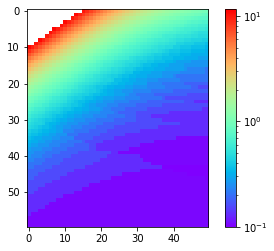

In [93]:
plt.imshow(arr_FWHM3, interpolation='None', cmap='rainbow', norm=colors.LogNorm(), vmin=0.1, vmax=11.5)
plt.colorbar()
plt.show()

In [94]:
numpy.savetxt('FWHM_case1.txt', arr_FWHM2, delimiter=',')

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_8016/536961799.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\a

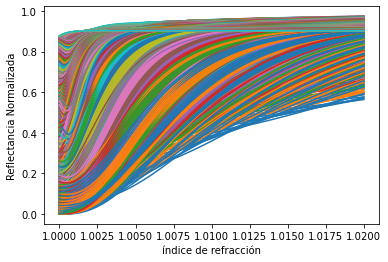

In [103]:
# Creation of an empty variable
n_entry=1.5
n_exit_arr=numpy.linspace(1.00,1.02,100)
theta_in_deg_list = arr_min_ang2
#reflection_p_to_p = []

epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])



eps_a=numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])


eps_b=numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])

#espesor_a=numpy.array([10,20,30,40,50,60,70])
#thick_a=10
#espesor_b=numpy.array([10,20,30,40,50,60,70])
#reflection_p_to_p = []
espesor_a=numpy.arange(10,60,1)
#thick_a=10
espesor_b=numpy.arange(0,60,1)


N=1

wl_nm=633

# Calculation of the reflectance for each wavelength

max_dev=[]
for i, thick_a in enumerate(espesor_a):
    
    
    lista=[]
    max_dev.append(lista)
    for j, thick_b in enumerate(espesor_b):
        reflection_p_to_p = []

        for k, n_exit in enumerate(n_exit_arr):
            theta_in_deg=theta_in_deg_list[i][j]
            theta_in_rad=theta_in_deg*numpy.pi/180
            epsilon_exit = numpy.array([[n_exit_arr[k] ** 2, 0, 0],
                                        [0, n_exit_arr[k] ** 2, 0],
                                        [0, 0, n_exit_arr[k] ** 2]])
            # Calculation of the wavevector

            k0 = 2 * numpy.pi / wl_nm
            Kx = n_entry * numpy.sin(theta_in_rad)
            Ky = 0
            Kz_entry = n_entry * numpy.cos(theta_in_rad)
            theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
            Kz_exit = n_exit_arr[k] * numpy.cos(theta_out_rad)
            Kz = n_entry * numpy.cos(theta_in_rad)

            # Creation of the entry and exit half-spaces and of the two layers
            entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
            exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
            layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
            layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

            # Creation of the periodic stack
            my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
            my_stack_structure.add_layers([layer_a, layer_b])
            my_stack_structure.N_periods = N

            # Calculation of the reflectance and storage
            J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
            reflection_p_to_p.append(J_refl_lin[0, 0])
        #reflection=reflection_p_to_p/max(reflection_p_to_p)

        derivada=numpy.gradient(reflection_p_to_p,n_exit_arr)
        maxdev=max(derivada)
        lista.append(maxdev)

        # Plotting
        plt.plot(n_exit_arr, reflection_p_to_p)
        plt.ylabel('Reflectancia Normalizada')
        plt.xlabel('índice de refracción')
        #plt.legend(title="multicapa plata sobre oro \n espesor plata-espesor oro")
        #plt.ylim(0,1)
        #plt.xlim(42,47.5)
        #plt.xticks(numpy.arange(39, 47.5, step=1.0))
        #plt.legend(title="oro=10 nm, \n plata=")
        #plt.savefig("multicapa_oro70nm.jpg",dpi=300)

In [ ]:
arr_max_dev=numpy.array([max_dev])

In [14]:
arr_max_dev.shape

NameError: name 'arr_max_dev' is not defined

In [106]:
arr_max_dev2=arr_max_dev.reshape(50,60)

In [107]:
arr_max_dev3=numpy.transpose(arr_max_dev2)

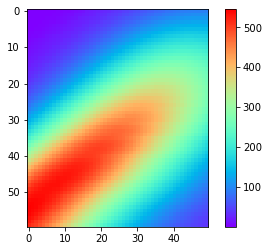

In [108]:
plt.imshow(arr_max_dev3, interpolation='None', cmap='rainbow')
plt.colorbar()
plt.show()

In [109]:
numpy.savetxt('max_dev_case1.txt', arr_max_dev2, delimiter=',')

C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24956/3369837148.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


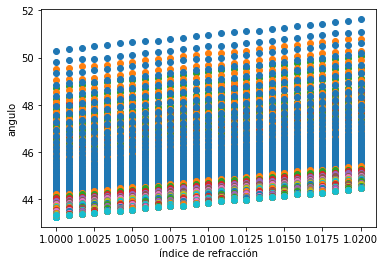

In [2]:
# Creation of an empty variable
n_entry=1.5
n_exit_arr=numpy.linspace(1.00,1.02,25)
theta_in_deg_list = numpy.linspace(43,55,200)
#reflection_p_to_p = []

epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])



eps_a=numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])


eps_b=numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])

#espesor_a=numpy.array([10,20,30,40,50,60,70])
#thick_a=10
#espesor_b=numpy.array([10,20,30,40,50,60,70])
#reflection_p_to_p = []
espesor_a=numpy.arange(10,60,1)
#thick_a=10
espesor_b=numpy.arange(0,60,1)


N=1

wl_nm=633

# Calculation of the reflectance for each wavelength

pend2=[]

for thick_a in espesor_a:
    
    pend=[]
    pend2.append(pend)
    for thick_b in espesor_b:
                     
        angle=[]
        
        for k in range(len(n_exit_arr)):
            reflection_p_to_p = []

            epsilon_exit = numpy.array([[n_exit_arr[k] ** 2, 0, 0],
                                        [0, n_exit_arr[k] ** 2, 0],
                                        [0, 0, n_exit_arr[k] ** 2]])
            # Calculation of the wavevector
            for theta_in_deg in theta_in_deg_list:
                theta_in_rad=theta_in_deg*numpy.pi/180
                k0 = 2 * numpy.pi / wl_nm
                Kx = n_entry * numpy.sin(theta_in_rad)
                Ky = 0
                Kz_entry = n_entry * numpy.cos(theta_in_rad)
                theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
                Kz_exit = n_exit_arr[k] * numpy.cos(theta_out_rad)
                Kz = n_entry * numpy.cos(theta_in_rad)

                # Creation of the entry and exit half-spaces and of the two layers
                entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
                exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
                layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
                layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

                # Creation of the periodic stack
                my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
                my_stack_structure.add_layers([layer_a, layer_b])
                my_stack_structure.N_periods = N

                # Calculation of the reflectance and storage
                J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
                reflection_p_to_p.append(J_refl_lin[0, 0])
                #reflection=reflection_p_to_p/max(reflection_p_to_p)

            minimo=min(reflection_p_to_p)
            angulo=theta_in_deg_list[reflection_p_to_p.index(minimo)]
            angle.append(angulo)
            
            #plt.plot(theta_in_deg_list, reflection_p_to_p)
            #plt.ylabel('Reflectance')
            #plt.xlabel('angulo')
            
        #derivada=numpy.gradient(reflection_p_to_p,n_exit_arr)
        #maxdev=max(derivada)
        #listaaa.append(maxdev)
        res = stats.linregress(n_exit_arr, angle)
        pendiente=res.slope
        pend.append(pendiente)
        
        
        plt.plot(n_exit_arr, angle,'o')
        plt.ylabel('angulo')
        plt.xlabel('índice de refracción')
            # Plotting
#            plt.plot(theta_in_deg_list, reflection_p_to_p)
#            plt.ylabel('angulo')
#            plt.xlabel('Reflectance')
            #plt.legend(title="multicapa plata sobre oro \n espesor plata-espesor oro")
            #plt.ylim(0,1)
            #plt.xlim(42,47.5)
            #plt.xticks(numpy.arange(39, 47.5, step=1.0))
            #plt.legend(title="oro=10 nm, \n plata=")
            #plt.savefig("multicapa_oro70nm.jpg",dpi=300)

In [3]:
arr_slope=numpy.array(pend2)

In [4]:
arr_slope_t=numpy.transpose(arr_slope)

In [5]:
arr_slope_t.shape

(60, 50)

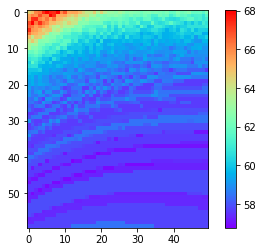

In [19]:
plt.imshow(arr_slope_t, interpolation='None', cmap='rainbow')
#plt.clim(50, 70)
plt.colorbar()
plt.show()

In [7]:
numpy.savetxt('dev_case1_angle.txt', arr_slope, delimiter=',')

# ángulo, mínimo, sensibilidad,  oro (eje x) sobre plata (eje y)

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/1074998297.py:59: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

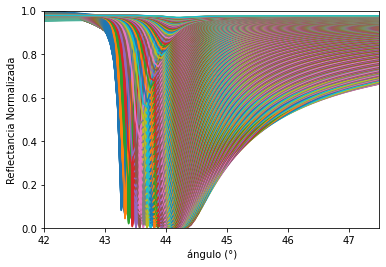

In [2]:
# Creation of an empty variable
n_entry=1.5
n_exit=1.00
theta_in_deg_list = numpy.linspace(42,54,200)
#reflection_p_to_p = []
epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])



eps_b=numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])


eps_a=numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])

#espesor_a=numpy.array([10,20,30,40,50,60,70])
#thick_a=10
#espesor_b=numpy.array([10,20,30,40,50,60,70])
#reflection_p_to_p = []
espesor_a=numpy.arange(10,60,1)
#thick_a=10
espesor_b=numpy.arange(0,60,1)


N=1

wl_nm=633

# Calculation of the reflectance for each wavelength

min_ang=[]
minimo_int=[]
for thick_a in espesor_a:
    
    
    lista=[]
    listaa=[]
    min_ang.append(lista)
    minimo_int.append(listaa)
    for thick_b in espesor_b:
        reflection_p_to_p = []

        for theta_in_deg in theta_in_deg_list:
            theta_in_rad=theta_in_deg*numpy.pi/180
            # Calculation of the wavevector

            k0 = 2 * numpy.pi / wl_nm
            Kx = n_entry * numpy.sin(theta_in_rad)
            Ky = 0
            Kz_entry = n_entry * numpy.cos(theta_in_rad)
            theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
            Kz_exit = n_exit * numpy.cos(theta_out_rad)
            Kz = n_entry * numpy.cos(theta_in_rad)

            # Creation of the entry and exit half-spaces and of the two layers
            entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
            exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
            layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
            layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

            # Creation of the periodic stack
            my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
            my_stack_structure.add_layers([layer_a, layer_b])
            my_stack_structure.N_periods = N

            # Calculation of the reflectance and storage
            J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
            reflection_p_to_p.append(J_refl_lin[0, 0])
        #reflection=reflection_p_to_p/max(reflection_p_to_p)
        minimo=min(reflection_p_to_p)
        angulo=theta_in_deg_list[reflection_p_to_p.index(minimo)]
        listaa.append(minimo)
        lista.append(angulo)

        # Plotting
        plt.plot(theta_in_deg_list, reflection_p_to_p)
        plt.ylabel('Reflectancia Normalizada')
        plt.xlabel('ángulo (°)')
        plt.ylim(0,1)
        plt.xlim(42,47.5)
        plt.xticks(numpy.arange(42, 47.5, step=1.0))
        #plt.legend(title="multicapa plata sobre oro \n espesor plata-espesor oro")
        #plt.savefig("multicapa_oro70nm.jpg",dpi=300)

In [3]:
arr_min_ang=numpy.array([min_ang])
arr_min_int=numpy.array([minimo_int])

In [4]:
arr_min_ang.shape

(1, 50, 60)

In [5]:
arr_min_ang2=arr_min_ang.reshape(50,60)
arr_min_int2=arr_min_int.reshape(50,60)

In [6]:
arr_min_ang3=numpy.transpose(arr_min_ang2)
arr_min_int3=numpy.transpose(arr_min_int2)

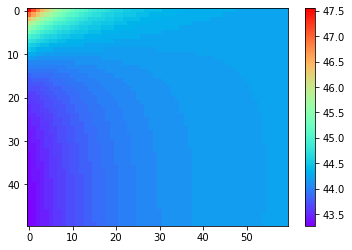

In [7]:
plt.imshow(arr_min_ang2, interpolation='None', cmap='rainbow')
plt.colorbar()
plt.show()

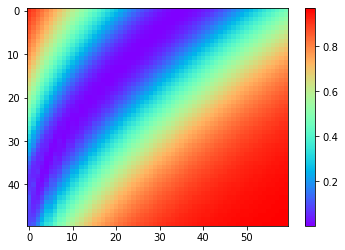

In [8]:
plt.imshow(arr_min_int2, interpolation='None', cmap='rainbow')
plt.colorbar()
plt.show()

In [9]:
numpy.savetxt('theta_min_case2.txt', arr_min_ang3, delimiter=',')

In [10]:
numpy.savetxt('intensidad_min_case2.txt', arr_min_int3, delimiter=',')

### FWHM

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_14960/2040251159.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

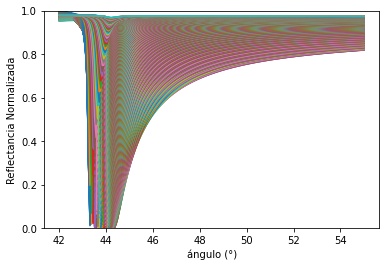

In [31]:
# Creation of an empty variable
n_entry=1.5
n_exit=1.00
theta_in_deg_list = numpy.linspace(42,55,200)
#reflection_p_to_p = []
epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])



eps_b=numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])


eps_a=numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])

#espesor_a=numpy.array([10,20,30,40,50,60,70])
#thick_a=10
#espesor_b=numpy.array([10,20,30,40,50,60,70])
#reflection_p_to_p = []
espesor_a=numpy.arange(10,60,1)
#thick_a=10
espesor_b=numpy.arange(0,60,1)


N=1

wl_nm=633

# Calculation of the reflectance for each wavelength

FWHM=[]
for thick_a in espesor_a:
    
    
    lista=[]
    
    FWHM.append(lista)
    
    for thick_b in espesor_b:
        reflection_p_to_p = []

        for theta_in_deg in theta_in_deg_list:
            theta_in_rad=theta_in_deg*numpy.pi/180
            # Calculation of the wavevector

            k0 = 2 * numpy.pi / wl_nm
            Kx = n_entry * numpy.sin(theta_in_rad)
            Ky = 0
            Kz_entry = n_entry * numpy.cos(theta_in_rad)
            theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
            Kz_exit = n_exit * numpy.cos(theta_out_rad)
            Kz = n_entry * numpy.cos(theta_in_rad)

            # Creation of the entry and exit half-spaces and of the two layers
            entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
            exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
            layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
            layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

            # Creation of the periodic stack
            my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
            my_stack_structure.add_layers([layer_a, layer_b])
            my_stack_structure.N_periods = N

            # Calculation of the reflectance and storage
            J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
            reflection_p_to_p.append(J_refl_lin[0, 0])
        #reflection=reflection_p_to_p/max(reflection_p_to_p)
        
        arr_x = theta_in_deg_list
        arr_y = numpy.array(reflection_p_to_p)
        peaks = numpy.where((arr_y[1:-1] > arr_y[0:-2]) * (arr_y[1:-1] > arr_y[2:]))[0] + 1
        dips = numpy.where((arr_y[1:-1] < arr_y[0:-2]) * (arr_y[1:-1] < arr_y[2:]))[0] + 1

        # Effective code
        difference = max(arr_y) - arr_y[dips[0]]
        HM = difference / 2 + arr_y[dips[0]]
        #HM=difference / 2
        maximum=arr_y[dips[0]:-1].argmax()
        pos_extremum = maximum+dips[0]  # or in your case: arr_y.argmin()

        if all((arr_y[pos_extremum:-1] - HM) < 0):
            width=1000
            
        else:
            nearest_above = (numpy.abs(arr_y[dips[0]:pos_extremum] - HM)).argmin()
            nearest_below = (numpy.abs(arr_y[0:dips[0]] - HM)).argmin()

            width = (numpy.mean(arr_x[nearest_above + dips[0]]) - numpy.mean(arr_x[nearest_below]))

        
        lista.append(width)

        # Plotting
        plt.plot(arr_x, arr_y)
        plt.ylabel('Reflectancia Normalizada')
        plt.xlabel('ángulo (°)')
        plt.ylim(0,1)
        #plt.xlim(42,47.5)
        #plt.xticks(numpy.arange(42, 47.5, step=1.0))
        #plt.legend(title="multicapa plata sobre oro \n espesor plata-espesor oro")
        #plt.savefig("multicapa_oro70nm.jpg",dpi=300)

In [32]:
arr_FWHM=numpy.array([FWHM])

In [33]:
arr_FWHM.shape

(1, 50, 60)

In [34]:
arr_FWHM2=arr_FWHM.reshape(50,60)

In [35]:
arr_FWHM2[arr_FWHM2==1000] = None

In [147]:
arr_FWHM2[arr_FWHM2>=2] = None

In [36]:
arr_FWHM3=numpy.transpose(arr_FWHM2)

In [92]:
from matplotlib import colors

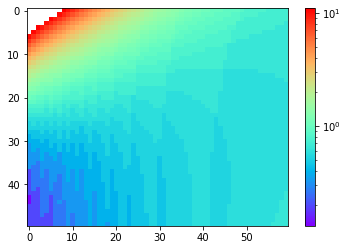

In [39]:
plt.imshow(arr_FWHM2, interpolation='None', cmap='rainbow', norm=colors.LogNorm())
plt.colorbar()
plt.show()

In [160]:
numpy.savetxt('FWHM_case2.txt', arr_FWHM3, delimiter=',')

C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_25992/2134329455.py:58: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


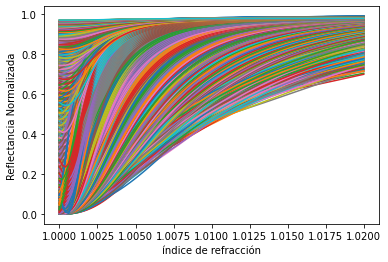

In [11]:
# Creation of an empty variable
n_entry=1.5
n_exit_arr=numpy.linspace(1.00,1.02,100)
theta_in_deg_list = arr_min_ang2
#reflection_p_to_p = []

epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])



eps_b=numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])


eps_a=numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])

#espesor_a=numpy.array([10,20,30,40,50,60,70])
#thick_a=10
#espesor_b=numpy.array([10,20,30,40,50,60,70])
#reflection_p_to_p = []
espesor_a=numpy.arange(10,60,1)
#thick_a=10
espesor_b=numpy.arange(0,60,1)


N=1

wl_nm=633

# Calculation of the reflectance for each wavelength

max_dev=[]
for i, thick_a in enumerate(espesor_a):
    
    
    lista=[]
    max_dev.append(lista)
    for j, thick_b in enumerate(espesor_b):
        reflection_p_to_p = []

        for k, n_exit in enumerate(n_exit_arr):
            theta_in_deg=theta_in_deg_list[i][j]
            theta_in_rad=theta_in_deg*numpy.pi/180
            epsilon_exit = numpy.array([[n_exit_arr[k] ** 2, 0, 0],
                                        [0, n_exit_arr[k] ** 2, 0],
                                        [0, 0, n_exit_arr[k] ** 2]])
            # Calculation of the wavevector

            k0 = 2 * numpy.pi / wl_nm
            Kx = n_entry * numpy.sin(theta_in_rad)
            Ky = 0
            Kz_entry = n_entry * numpy.cos(theta_in_rad)
            theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
            Kz_exit = n_exit_arr[k] * numpy.cos(theta_out_rad)
            Kz = n_entry * numpy.cos(theta_in_rad)

            # Creation of the entry and exit half-spaces and of the two layers
            entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
            exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
            layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
            layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

            # Creation of the periodic stack
            my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
            my_stack_structure.add_layers([layer_a, layer_b])
            my_stack_structure.N_periods = N

            # Calculation of the reflectance and storage
            J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
            reflection_p_to_p.append(J_refl_lin[0, 0])
        #reflection=reflection_p_to_p/max(reflection_p_to_p)

        derivada=numpy.gradient(reflection_p_to_p,n_exit_arr)
        maxdev=max(derivada)
        lista.append(maxdev)

        # Plotting
        plt.plot(n_exit_arr, reflection_p_to_p)
        plt.ylabel('Reflectancia Normalizada')
        plt.xlabel('índice de refracción')
        #plt.legend(title="multicapa plata sobre oro \n espesor plata-espesor oro")
        #plt.ylim(0,1)
        #plt.xlim(42,47.5)
        #plt.xticks(numpy.arange(39, 47.5, step=1.0))
        #plt.legend(title="oro=10 nm, \n plata=")
        #plt.savefig("multicapa_oro70nm.jpg",dpi=300)

In [12]:
arr_max_dev=numpy.array([max_dev])

In [13]:
arr_max_dev.shape

(1, 50, 60)

In [14]:
arr_max_dev2=arr_max_dev.reshape(50,60)

In [15]:
arr_max_dev3=numpy.transpose(arr_max_dev2)

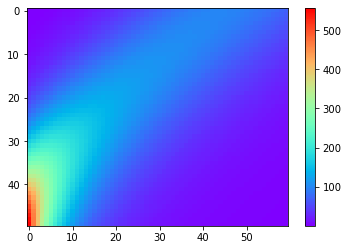

In [16]:
plt.imshow(arr_max_dev2, interpolation='None', cmap='rainbow')
plt.colorbar()
plt.show()

In [17]:
numpy.savetxt('max_dev_case2.txt', arr_max_dev3, delimiter=',')

C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_24168/3640999593.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


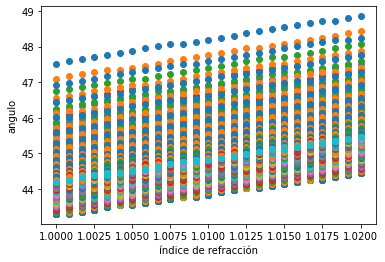

In [4]:
# Creation of an empty variable
n_entry=1.5
n_exit_arr=numpy.linspace(1.00,1.02,25)
theta_in_deg_list = numpy.linspace(43,55,200)
#reflection_p_to_p = []

epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])



eps_b=numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])


eps_a=numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])

#espesor_a=numpy.array([10,20,30,40,50,60,70])
#thick_a=10
#espesor_b=numpy.array([10,20,30,40,50,60,70])
#reflection_p_to_p = []
espesor_b=numpy.arange(0,60,1)
#thick_a=10
espesor_a=numpy.arange(10,60,1)


N=1

wl_nm=633

# Calculation of the reflectance for each wavelength

pend2=[]

for thick_a in espesor_a:
    
    pend=[]
    pend2.append(pend)
    for thick_b in espesor_b:
                     
        angle=[]
        
        for k in range(len(n_exit_arr)):
            reflection_p_to_p = []

            epsilon_exit = numpy.array([[n_exit_arr[k] ** 2, 0, 0],
                                        [0, n_exit_arr[k] ** 2, 0],
                                        [0, 0, n_exit_arr[k] ** 2]])
            # Calculation of the wavevector
            for theta_in_deg in theta_in_deg_list:
                theta_in_rad=theta_in_deg*numpy.pi/180
                k0 = 2 * numpy.pi / wl_nm
                Kx = n_entry * numpy.sin(theta_in_rad)
                Ky = 0
                Kz_entry = n_entry * numpy.cos(theta_in_rad)
                theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
                Kz_exit = n_exit_arr[k] * numpy.cos(theta_out_rad)
                Kz = n_entry * numpy.cos(theta_in_rad)

                # Creation of the entry and exit half-spaces and of the two layers
                entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
                exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
                layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
                layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

                # Creation of the periodic stack
                my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
                my_stack_structure.add_layers([layer_a, layer_b])
                my_stack_structure.N_periods = N

                # Calculation of the reflectance and storage
                J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
                reflection_p_to_p.append(J_refl_lin[0, 0])
                #reflection=reflection_p_to_p/max(reflection_p_to_p)

            minimo=min(reflection_p_to_p)
            angulo=theta_in_deg_list[reflection_p_to_p.index(minimo)]
            angle.append(angulo)
            
            #plt.plot(theta_in_deg_list, reflection_p_to_p)
            #plt.ylabel('Reflectance')
            #plt.xlabel('angulo')
            
        #derivada=numpy.gradient(reflection_p_to_p,n_exit_arr)
        #maxdev=max(derivada)
        #listaaa.append(maxdev)
        res = stats.linregress(n_exit_arr, angle)
        pendiente=res.slope
        pend.append(pendiente)
        
        
        plt.plot(n_exit_arr, angle,'o')
        plt.ylabel('angulo')
        plt.xlabel('índice de refracción')
            # Plotting
#            plt.plot(theta_in_deg_list, reflection_p_to_p)
#            plt.ylabel('angulo')
#            plt.xlabel('Reflectance')
            #plt.legend(title="multicapa plata sobre oro \n espesor plata-espesor oro")
            #plt.ylim(0,1)
            #plt.xlim(42,47.5)
            #plt.xticks(numpy.arange(39, 47.5, step=1.0))
            #plt.legend(title="oro=10 nm, \n plata=")
            #plt.savefig("multicapa_oro70nm.jpg",dpi=300)

In [5]:
arr_slope=numpy.array(pend2)

In [6]:
arr_slope_t=numpy.transpose(arr_slope)

In [7]:
arr_slope_t.shape

(60, 50)

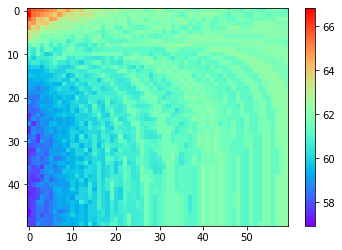

In [8]:
plt.imshow(arr_slope, interpolation='None', cmap='rainbow')
plt.colorbar()
plt.show()

In [9]:
numpy.savetxt('dev_case2_angle.txt', arr_slope_t, delimiter=',')

In [6]:
#Figura 1 para artículo

C:\Users\alfre\AppData\Local\Temp/ipykernel_15672/2328544538.py:38: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))


Text(0.5, 0, 'angle (°)')

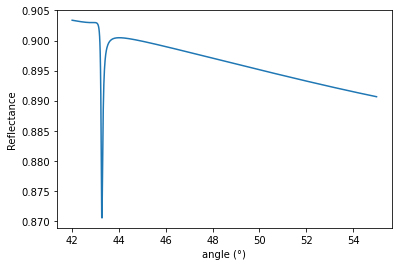

In [66]:
# Creation of an empty variable
n_entry=1.5 #vidrio
n_exit=1.00 #aire
theta_in_deg_list = numpy.linspace(42,55,1000)
reflection_p_to_p = []
epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])



eps_a=numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])


eps_b=numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])
thick_a=60
thick_b=60
N=1

wl_nm=633

# Calculation of the reflectance for each wavelength
for theta_in_deg in theta_in_deg_list:
    theta_in_rad=theta_in_deg*numpy.pi/180
    # Calculation of the wavevector
    
    k0 = 2 * numpy.pi / wl_nm
    Kx = n_entry * numpy.sin(theta_in_rad)
    Ky = 0
    Kz_entry = n_entry * numpy.cos(theta_in_rad)
    theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
    Kz_exit = n_exit * numpy.cos(theta_out_rad)
    Kz = n_entry * numpy.cos(theta_in_rad)
    
    # Creation of the entry and exit half-spaces and of the two layers
    entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
    exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
    layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
    layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

    # Creation of the periodic stack
    my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
    my_stack_structure.add_layers([layer_a, layer_b])
    my_stack_structure.N_periods = N

    # Calculation of the reflectance and storage
    J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
    reflection_p_to_p.append(J_refl_lin[0, 0])
    #reflection=reflection_p_to_p/max(reflection_p_to_p)
    minimo=min(reflection_p_to_p)
    minimo2=reflection_p_to_p.index(minimo)
    angulo=theta_in_deg_list[reflection_p_to_p.index(minimo)]

# Plotting
plt.plot(theta_in_deg_list, reflection_p_to_p)
plt.ylabel('Reflectance')
plt.xlabel('angle (°)')
#plt.ylim(0,1)
#plt.xlim(40,50)

In [60]:
angulo

43.27527527527528

In [69]:
arr_x = theta_in_deg_list
arr_y = numpy.array(reflection_p_to_p)
peaks = numpy.where((arr_y[1:-1] > arr_y[0:-2]) * (arr_y[1:-1] > arr_y[2:]))[0] + 1
dips = numpy.where((arr_y[1:-1] < arr_y[0:-2]) * (arr_y[1:-1] < arr_y[2:]))[0] + 1

In [71]:
arr_y[minimo2]

0.8705160352155692

In [70]:
minimo

0.8705160352155692

In [186]:
arr_y.argmin()

936

In [9]:
arr_y[dips][0]

0.9708138315940398

In [31]:
arr_y[dips[0]:pos_extremum]

array([0.97081383, 0.97082722, 0.97087039, 0.97094069, 0.97103508,
       0.97115033, 0.97128311, 0.97143017, 0.97158842, 0.97175501,
       0.97192735, 0.97210316, 0.97228049, 0.97245767, 0.97263331,
       0.97280629, 0.97297571, 0.97314089, 0.9733013 , 0.97345658,
       0.97360648, 0.97375085, 0.97388965, 0.97402287, 0.97415057,
       0.97427286, 0.97438987, 0.97450175, 0.97460868, 0.97471083,
       0.9748084 , 0.97490157, 0.97499054, 0.9750755 , 0.97515663,
       0.97523412, 0.97530814, 0.97537885, 0.97544643, 0.97551102,
       0.97557278, 0.97563185, 0.97568836, 0.97574244, 0.97579421,
       0.97584378, 0.97589128, 0.97593679, 0.97598041, 0.97602225,
       0.97606238, 0.97610089, 0.97613785, 0.97617334, 0.97620743,
       0.97624019, 0.97627167, 0.97630194, 0.97633105, 0.97635905,
       0.97638599, 0.97641193, 0.9764369 , 0.97646095, 0.97648411,
       0.97650643, 0.97652794, 0.97654867, 0.97656866, 0.97658794,
       0.97660654, 0.97662448, 0.9766418 , 0.97665851, 0.97667

In [56]:
minimo

0.8705160352155692

In [72]:
arr_x = theta_in_deg_list
arr_y = numpy.array(reflection_p_to_p)

#peaks = numpy.where((arr_y[1:-1] > arr_y[0:-2]) * (arr_y[1:-1] > arr_y[2:]))[0] + 1
#dips = numpy.where((arr_y[1:-1] < arr_y[0:-2]) * (arr_y[1:-1] < arr_y[2:]))[0] + 1

# Effective code
difference = max(arr_y) - minimo
HM = difference / 2 + minimo
#HM=difference / 2
maximum=arr_y[minimo2:-1].argmax()
pos_extremum = maximum+minimo2  # or in your case: arr_y.argmin()

if all((arr_y[minimo2:pos_extremum] - HM) < 0):
    width=1000
            
else:
    nearest_above = (numpy.abs(arr_y[minimo2:pos_extremum] - HM)).argmin()
    nearest_below = (numpy.abs(arr_y[0:minimo2] - HM)).argmin()

    width = (numpy.mean(arr_x[nearest_above + minimo2]) - numpy.mean(arr_x[nearest_below]))

In [73]:
width

0.09109109109108715

In [86]:
arr_y[dips[0]]

0.9770424267288078

In [87]:
angulo2=arr_x[reflection_p_to_p.index(arr_y[dips[0]])]

In [88]:
angulo2

44.23823823823824

In [72]:
b=arr_y[dips[0]:-1]

In [75]:
c=b.argmax()
c

158

In [76]:
arr_y[158]

0.9729499011130688

In [50]:
arr_x = theta_in_deg_list
arr_y = numpy.array(reflection_p_to_p)

peaks = numpy.where((arr_y[1:-1] > arr_y[0:-2]) * (arr_y[1:-1] > arr_y[2:]))[0] + 1
dips = numpy.where((arr_y[1:-1] < arr_y[0:-2]) * (arr_y[1:-1] < arr_y[2:]))[0] + 1

# Effective code
difference = max(arr_y) - arr_y[dips]
HM = difference / 2 + arr_y[dips]
#HM=difference / 2

In [52]:
dips[0]

170

In [ ]:
despues=arr_y[dips[0]:-1]
maximum=despues.argmax()
if all((arr_y[pos_extremum:-1] - HM) < 0) or all((arr_y[pos_extremum:-1] - HM) > 0):
    width=1000
            
else:
    nearest_above = (numpy.abs(arr_y[pos_extremum:despues] - HM)).argmin()
    nearest_below = (numpy.abs(arr_y[0:pos_extremum] - HM)).argmin()

    width = (numpy.mean(arr_x[nearest_above + pos_extremum]) - numpy.mean(arr_x[nearest_below]))

In [55]:
despues=arr_y[dips[0]:-1]
maximum=despues.argmax()

In [59]:
arr_y[maximum]

0.9729499011130688

In [193]:
a=arr_y[pos_extremum:-1]

In [197]:
arr_y[0:-1]

array([0.97913676, 0.97913385, 0.97913093, 0.97912801, 0.97912508,
       0.97912215, 0.97911921, 0.97911626, 0.97911332, 0.97911037,
       0.97910741, 0.97910445, 0.97910149, 0.97909852, 0.97909555,
       0.97909258, 0.97908961, 0.97908663, 0.97908365, 0.97908066,
       0.97907768, 0.97907469, 0.97907169, 0.9790687 , 0.9790657 ,
       0.9790627 , 0.9790597 , 0.97905669, 0.97905368, 0.97905067,
       0.97904766, 0.97904464, 0.97904162, 0.9790386 , 0.97903557,
       0.97903254, 0.97902951, 0.97902648, 0.97902344, 0.9790204 ,
       0.97901735, 0.9790143 , 0.97901125, 0.97900819, 0.97900513,
       0.97900206, 0.97899899, 0.97899591, 0.97899283, 0.97898974,
       0.97898665, 0.97898356, 0.97898045, 0.97897734, 0.97897423,
       0.9789711 , 0.97896797, 0.97896484, 0.97896169, 0.97895854,
       0.97895537, 0.9789522 , 0.97894902, 0.97894583, 0.97894262,
       0.97893941, 0.97893618, 0.97893294, 0.97892969, 0.97892643,
       0.97892314, 0.97891985, 0.97891653, 0.9789132 , 0.97890

In [179]:
arr_y[pos_extremum:-1] - HM

array([-4.06043983e-03, -4.05813843e-03, -4.05289866e-03, -4.04478438e-03,
       -4.03386472e-03, -4.02021360e-03, -4.00390930e-03, -3.98503396e-03,
       -3.96367314e-03, -3.93991535e-03, -3.91385157e-03, -3.88557483e-03,
       -3.85517973e-03, -3.82276206e-03, -3.78841834e-03, -3.75224550e-03,
       -3.71434045e-03, -3.67479978e-03, -3.63371941e-03, -3.59119428e-03,
       -3.54731814e-03, -3.50218323e-03, -3.45588009e-03, -3.40849733e-03,
       -3.36012152e-03, -3.31083692e-03, -3.26072548e-03, -3.20986662e-03,
       -3.15833717e-03, -3.10621134e-03, -3.05356059e-03, -3.00045364e-03,
       -2.94695644e-03, -2.89313213e-03, -2.83904108e-03, -2.78474088e-03,
       -2.73028636e-03, -2.67572964e-03, -2.62112019e-03, -2.56650480e-03,
       -2.51192775e-03, -2.45743077e-03, -2.40305316e-03, -2.34883186e-03,
       -2.29480149e-03, -2.24099446e-03, -2.18744102e-03, -2.13416935e-03,
       -2.08120565e-03, -2.02857420e-03, -1.97629746e-03, -1.92439611e-03,
       -1.87288919e-03, -

In [41]:
nearest_above

0

In [42]:
nearest_below = (numpy.abs(arr_y[0:pos_extremum] - HM)).argmin()

In [44]:
arr_y[pos_extremum:-1] - HM

array([0.14895573, 0.1713985 , 0.2293134 , 0.29615274, 0.35680265,
       0.40670455, 0.44625328, 0.47730275, 0.5017684 , 0.52122987,
       0.53689395, 0.54965792, 0.56018465, 0.56896557, 0.57636797,
       0.58266919, 0.58808103, 0.59276701, 0.59685482, 0.6004452 ,
       0.60361845, 0.60643916, 0.60895977, 0.61122318, 0.61326481,
       0.61511405, 0.61679552, 0.61832993, 0.61973484, 0.62102519,
       0.62221378, 0.62331163, 0.62432827, 0.62527197, 0.62614995,
       0.62696853, 0.62773326, 0.62844905, 0.62912024, 0.62975068,
       0.63034379, 0.63090265, 0.63142999, 0.6319283 , 0.63239978,
       0.63284644, 0.6332701 , 0.6336724 , 0.63405483, 0.63441876,
       0.63476543, 0.63509597, 0.63541143, 0.63571276, 0.63600082,
       0.63627644, 0.63654035, 0.63679324, 0.63703574, 0.63726845,
       0.6374919 , 0.6377066 , 0.63791303, 0.63811162, 0.63830277,
       0.63848687, 0.63866427, 0.63883531, 0.6390003 , 0.63915951,
       0.63931324, 0.63946174, 0.63960524, 0.63974397, 0.63987

In [33]:
numpy.savetxt('oro10_plara5_R_100.txt', reflection_p_to_p, delimiter=',')

In [34]:
numpy.savetxt('oro10_plara5_R_100_theta_100.txt', theta_in_deg_list, delimiter=',')

In [41]:
numpy.savetxt('plata30_oro20_R_1005.txt', reflection_p_to_p, delimiter=',')

In [42]:
numpy.savetxt('plata30_oro20_theta_1005.txt', theta_in_deg_list, delimiter=',')

In [17]:
minimo=min(reflection_p_to_p)
angulo=theta_in_deg_list[reflection_p_to_p.index(minimo)]
angulo

44.02010050251256

## probando sensibilidad en oxidación

C:\Users\alfre\AppData\Local\Temp/ipykernel_5244/3033850710.py:42: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))


(0.0, 1.0)

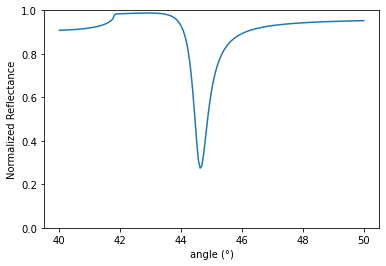

In [2]:
# Creation of an empty variable
n_entry=1.5 #vidrio
n_exit=1.00
theta_in_deg_list = numpy.linspace(40,50,200)
reflection_p_to_p = []

epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])
epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])



#eps_b=numpy.array([[(-18.6378+0.474925j), 0, 0],
#                   [0, (-18.6378+0.474925j), 0],
#                   [0, 0, (-18.6378+0.474925j)]])

eps_b=numpy.array([[(2.87+0j), 0, 0],
                   [0, (2.87+0j), 0],
                   [0, 0, (2.87+0j)]])

eps_a=numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])
thick_a=40
thick_b=10
N=1

wl_nm=633

# Calculation of the reflectance for each wavelength
for theta_in_deg in theta_in_deg_list:
    theta_in_rad=theta_in_deg*numpy.pi/180
    # Calculation of the wavevector
    
    k0 = 2 * numpy.pi / wl_nm
    Kx = n_entry * numpy.sin(theta_in_rad)
    Ky = 0
    Kz_entry = n_entry * numpy.cos(theta_in_rad)
    theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
    Kz_exit = n_exit * numpy.cos(theta_out_rad)
    Kz = n_entry * numpy.cos(theta_in_rad)
    
    # Creation of the entry and exit half-spaces and of the two layers
    entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
    exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
    layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
    layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

    # Creation of the periodic stack
    my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
    my_stack_structure.add_layers([layer_a, layer_b])
    my_stack_structure.N_periods = N

    # Calculation of the reflectance and storage
    J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
    reflection_p_to_p.append(J_refl_lin[0, 0])
    #reflection=reflection_p_to_p/max(reflection_p_to_p)

# Plotting
plt.plot(theta_in_deg_list, reflection_p_to_p)
plt.ylabel('Normalized Reflectance')
plt.xlabel('angle (°)')
plt.ylim(0,1)
#plt.xlim(40,50)

In [3]:
minimo=min(reflection_p_to_p)
angulo=theta_in_deg_list[reflection_p_to_p.index(minimo)]
angulo

44.62311557788945

In [4]:
numpy.savetxt('plata40_ox10_R_theta.txt', reflection_p_to_p, delimiter=',')

In [5]:
numpy.savetxt('plata40_ox10_theta.txt', theta_in_deg_list, delimiter=',')

C:\Users\alfre\AppData\Local\Temp/ipykernel_5244/929031342.py:42: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))


(0.0, 1.0)

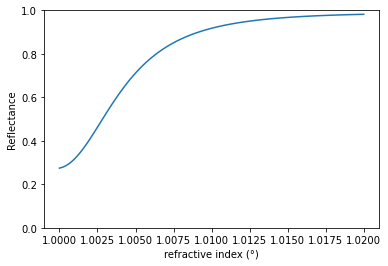

In [6]:
# Creation of an empty variable
n_entry=1.5 #vidrio
n_exit_arr=numpy.linspace(1.00,1.02,100)
theta_in_deg_list = angulo
reflection_p_to_p = []

epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])



#eps_b=numpy.array([[(-18.6378+0.474925j), 0, 0],
#                   [0, (-18.6378+0.474925j), 0],
#                   [0, 0, (-18.6378+0.474925j)]])

eps_b=numpy.array([[(2.87+0j), 0, 0],
                   [0, (2.87+0j), 0],
                   [0, 0, (2.87+0j)]])

eps_a=numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])
thick_a=40
thick_b=10
N=1

wl_nm=633

# Calculation of the reflectance for each wavelength
for n_exit in n_exit_arr:
    theta_in_rad=theta_in_deg_list*numpy.pi/180
    epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                                [0, n_exit ** 2, 0],
                                [0, 0, n_exit ** 2]])
    # Calculation of the wavevector
    
    k0 = 2 * numpy.pi / wl_nm
    Kx = n_entry * numpy.sin(theta_in_rad)
    Ky = 0
    Kz_entry = n_entry * numpy.cos(theta_in_rad)
    theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
    Kz_exit = n_exit * numpy.cos(theta_out_rad)
    Kz = n_entry * numpy.cos(theta_in_rad)
    
    # Creation of the entry and exit half-spaces and of the two layers
    entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
    exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
    layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
    layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

    # Creation of the periodic stack
    my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
    my_stack_structure.add_layers([layer_a, layer_b])
    my_stack_structure.N_periods = N

    # Calculation of the reflectance and storage
    J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
    reflection_p_to_p.append(J_refl_lin[0, 0])
    #reflection=reflection_p_to_p/max(reflection_p_to_p)

# Plotting
plt.plot(n_exit_arr, reflection_p_to_p)
plt.ylabel('Reflectance')
plt.xlabel('refractive index (°)')
plt.ylim(0,1)
#plt.xlim(40,50)

In [7]:
numpy.savetxt('plata40_ox10_R_n.txt', reflection_p_to_p, delimiter=',')

In [8]:
numpy.savetxt('plata40_ox10_n.txt', n_exit_arr, delimiter=',')

## Sensibilidad sin oxidación

C:\Users\alfre\AppData\Local\Temp/ipykernel_24924/2437954451.py:39: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))


(0.0, 1.0)

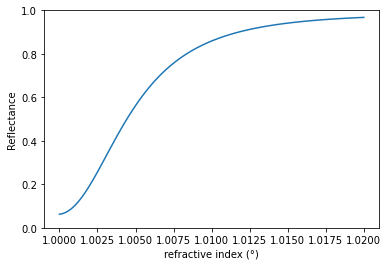

In [43]:
# Creation of an empty variable
n_entry=1.5 #vidrio
n_exit_arr=numpy.linspace(1.00,1.02,100)
theta_in_deg_list = angulo
reflection_p_to_p = []

epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])



eps_b=numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])


eps_a=numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])
thick_a=30
thick_b=20
N=1

wl_nm=633

# Calculation of the reflectance for each wavelength
for n_exit in n_exit_arr:
    theta_in_rad=theta_in_deg_list*numpy.pi/180
    epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                                [0, n_exit ** 2, 0],
                                [0, 0, n_exit ** 2]])
    # Calculation of the wavevector
    
    k0 = 2 * numpy.pi / wl_nm
    Kx = n_entry * numpy.sin(theta_in_rad)
    Ky = 0
    Kz_entry = n_entry * numpy.cos(theta_in_rad)
    theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
    Kz_exit = n_exit * numpy.cos(theta_out_rad)
    Kz = n_entry * numpy.cos(theta_in_rad)
    
    # Creation of the entry and exit half-spaces and of the two layers
    entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
    exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
    layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
    layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

    # Creation of the periodic stack
    my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
    my_stack_structure.add_layers([layer_a, layer_b])
    my_stack_structure.N_periods = N

    # Calculation of the reflectance and storage
    J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
    reflection_p_to_p.append(J_refl_lin[0, 0])
    #reflection=reflection_p_to_p/max(reflection_p_to_p)

# Plotting
plt.plot(n_exit_arr, reflection_p_to_p)
plt.ylabel('Reflectance')
plt.xlabel('refractive index (°)')
plt.ylim(0,1)
#plt.xlim(40,50)

In [44]:
numpy.savetxt('plata30_oro20_R_n.txt', reflection_p_to_p, delimiter=',')

In [45]:
numpy.savetxt('plata30_oro20_n.txt', n_exit_arr, delimiter=',')

C:\Users\alfre\AppData\Local\Temp/ipykernel_5972/1487217084.py:57: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))


165.25294525294456

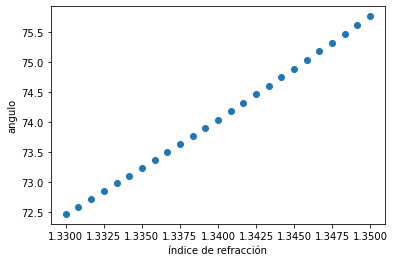

In [3]:
# Creation of an empty variable
n_entry=1.5
n_exit_arr=numpy.linspace(1.33,1.35,25)
theta_in_deg_list = numpy.linspace(70,85,1000)
#reflection_p_to_p = []

epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])



eps_b=numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])


eps_a=numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])

#espesor_a=numpy.array([10,20,30,40,50,60,70])
#thick_a=10
#espesor_b=numpy.array([10,20,30,40,50,60,70])
#reflection_p_to_p = []
espesor_b=numpy.arange(0,60,1)
#thick_a=10
espesor_a=numpy.arange(10,60,1)


N=1

wl_nm=633

# Calculation of the reflectance for each wavelength

pend2=[]

thick_a=30
thick_b=20
               
angle=[]
        
for k in range(len(n_exit_arr)):
    reflection_p_to_p = []

    epsilon_exit = numpy.array([[n_exit_arr[k] ** 2, 0, 0],
                                [0, n_exit_arr[k] ** 2, 0],
                                [0, 0, n_exit_arr[k] ** 2]])
    # Calculation of the wavevector
    for theta_in_deg in theta_in_deg_list:
        theta_in_rad=theta_in_deg*numpy.pi/180
        k0 = 2 * numpy.pi / wl_nm
        Kx = n_entry * numpy.sin(theta_in_rad)
        Ky = 0
        Kz_entry = n_entry * numpy.cos(theta_in_rad)
        theta_out_rad = numpy.arcsin((n_entry/n_exit_arr[k])*numpy.sin(theta_in_rad))
        Kz_exit = n_exit_arr[k] * numpy.cos(theta_out_rad)
        Kz = n_entry * numpy.cos(theta_in_rad)

        # Creation of the entry and exit half-spaces and of the two layers
        entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
        exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
        layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
        layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

        # Creation of the periodic stack
        my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
        my_stack_structure.add_layers([layer_a, layer_b])
        my_stack_structure.N_periods = N

        # Calculation of the reflectance and storage
        J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
        reflection_p_to_p.append(J_refl_lin[0, 0])
        #reflection=reflection_p_to_p/max(reflection_p_to_p)

    minimo=min(reflection_p_to_p)
    angulo=theta_in_deg_list[reflection_p_to_p.index(minimo)]
    angle.append(angulo)
            
    #plt.plot(theta_in_deg_list, reflection_p_to_p)
    #plt.ylabel('Reflectance')
    #plt.xlabel('angulo')
            
#derivada=numpy.gradient(reflection_p_to_p,n_exit_arr)
#maxdev=max(derivada)
#listaaa.append(maxdev)
res = stats.linregress(n_exit_arr, angle)
pendiente=res.slope
        
        
plt.plot(n_exit_arr, angle,'o')
plt.ylabel('angulo')
plt.xlabel('índice de refracción')
            # Plotting
#            plt.plot(theta_in_deg_list, reflection_p_to_p)
#            plt.ylabel('angulo')
#            plt.xlabel('Reflectance')
            #plt.legend(title="multicapa plata sobre oro \n espesor plata-espesor oro")
            #plt.ylim(0,1)
            #plt.xlim(42,47.5)
            #plt.xticks(numpy.arange(39, 47.5, step=1.0))
            #plt.legend(title="oro=10 nm, \n plata=")
            #plt.savefig("multicapa_oro70nm.jpg",dpi=300)
pendiente

In [9]:
numpy.savetxt('plata30_oro20_n_exit.txt', n_exit_arr, delimiter=',')

In [10]:
numpy.savetxt('plata30_oro20_theta_min.txt', angle, delimiter=',')

## Diferentes láser

C:\Users\alfre\AppData\Local\Temp/ipykernel_16528/2911612326.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))


(0.0, 1.0)

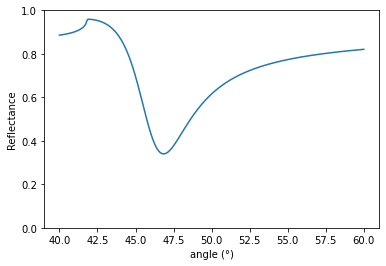

In [67]:
# Creation of an empty variable
n_entry=1.5 #vidrio
n_exit=1.00 #aire
theta_in_deg_list = numpy.linspace(40,60,300)
reflection_p_to_p = []
epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])


#633 nm
#eps_b=numpy.array([[(-11.6628+1.26957j), 0, 0],
#                   [0, (-11.6628+1.26957j), 0],
#                   [0, 0, (-11.6628+1.26957j)]])


#eps_a=numpy.array([[(-18.6378+0.474925j), 0, 0],
#                   [0, (-18.6378+0.474925j), 0],
#                   [0, 0, (-18.6378+0.474925j)]])
        
#532 nm
eps_b=numpy.array([[(-4.61374+2.41525j), 0, 0],
                   [0, (-4.61374+2.41525j), 0],
                   [0, 0, (-4.61374+2.41525j)]])


eps_a=numpy.array([[(-11.68354+0.36688j), 0, 0],
                   [0, (-11.68354+0.36688j), 0],
                   [0, 0, (-11.68354+0.36688j)]])
                   
#450 nm
#eps_b=numpy.array([[(-1.75029+5.33041j), 0, 0],
                   #[0, (-1.75029+5.33041j), 0],
                   #[0, 0, (-1.75029+5.33041j)]])


#eps_a=numpy.array([[(-6.92795+0.21053j), 0, 0],
                   #[0, (-6.92795+0.21053j), 0],
                   #[0, 0, (-6.92795+0.21053j)]])
        
        
thick_a=30
thick_b=20
N=1

wl_nm=532

# Calculation of the reflectance for each wavelength
for theta_in_deg in theta_in_deg_list:
    theta_in_rad=theta_in_deg*numpy.pi/180
    # Calculation of the wavevector
    
    k0 = 2 * numpy.pi / wl_nm
    Kx = n_entry * numpy.sin(theta_in_rad)
    Ky = 0
    Kz_entry = n_entry * numpy.cos(theta_in_rad)
    theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
    Kz_exit = n_exit * numpy.cos(theta_out_rad)
    Kz = n_entry * numpy.cos(theta_in_rad)
    
    # Creation of the entry and exit half-spaces and of the two layers
    entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
    exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
    layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
    layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

    # Creation of the periodic stack
    my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
    my_stack_structure.add_layers([layer_a, layer_b])
    my_stack_structure.N_periods = N

    # Calculation of the reflectance and storage
    J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
    reflection_p_to_p.append(J_refl_lin[0, 0])
    #reflection=reflection_p_to_p/max(reflection_p_to_p)
    minimo=min(reflection_p_to_p)
    angulo=theta_in_deg_list[reflection_p_to_p.index(minimo)]

# Plotting
plt.plot(theta_in_deg_list, reflection_p_to_p)
plt.ylabel('Reflectance')
plt.xlabel('angle (°)')
plt.ylim(0,1)
#plt.xlim(40,50)

In [63]:
numpy.savetxt('plata30_oro20_R_532nm.txt', reflection_p_to_p, delimiter=',')

In [64]:
numpy.savetxt('plata30_oro20_theta_532nm.txt', theta_in_deg_list, delimiter=',')

# Plata sobre oro en función de la longitud de onda

In [5]:
# Data de Johnson y Christy para plata y oro

C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/1506471568.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/1506471568.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/1506471568.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/1506471568.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/1506471568.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

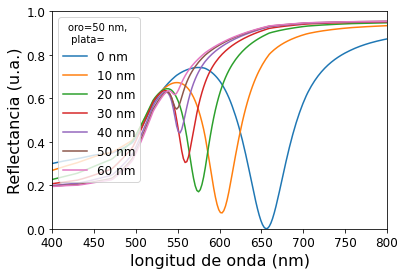

In [124]:
# Creation of an empty variable
n_entry=1.5
n_exit=1.00
theta_in_deg = 44

#reflection_p_to_p = []

epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])

e1_Au=numpy.loadtxt("e1_Au.txt")
e2_Au=numpy.loadtxt("e2_Au.txt")
e_Au=numpy.vectorize(complex)(e1_Au, e2_Au)

e1_Ag=numpy.loadtxt("e1_Ag.txt")
e2_Ag=numpy.loadtxt("e2_Ag.txt")
e_Ag=numpy.vectorize(complex)(e1_Ag, e2_Ag)




#espesor_a=numpy.array([10,20,30,40,50,60,70])
#thick_a=10
#espesor_b=numpy.array([10,20,30,40,50,60,70])
#reflection_p_to_p = []
#espesor_a=10
thick_a=50

espesor_b=numpy.arange(0,70,10)


N=1

wl=numpy.linspace(400,800,200)

# Calculation of the reflectance for each wavelength


for thick_b in espesor_b:
    reflection_p_to_p = []

    for k, wl_nm in enumerate(wl):
        theta_in_rad=theta_in_deg*numpy.pi/180
        # Calculation of the wavevector
        eps_a=numpy.array([[e_Au[k], 0, 0],
                            [0, e_Au[k], 0],
                            [0, 0, e_Au[k]]])
        eps_b=numpy.array([[e_Ag[k], 0, 0],
                            [0, e_Ag[k], 0],
                            [0, 0, e_Ag[k]]])

        k0 = 2 * numpy.pi / wl_nm
        Kx = n_entry * numpy.sin(theta_in_rad)
        Ky = 0
        Kz_entry = n_entry * numpy.cos(theta_in_rad)
        theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
        Kz_exit = n_exit * numpy.cos(theta_out_rad)
        Kz = n_entry * numpy.cos(theta_in_rad)

        # Creation of the entry and exit half-spaces and of the two layers
        entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
        exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
        layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
        layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

        # Creation of the periodic stack
        my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
        my_stack_structure.add_layers([layer_a, layer_b])
        my_stack_structure.N_periods = N

        # Calculation of the reflectance and storage
        J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
        reflection_p_to_p.append(J_refl_lin[0, 0])
    #reflection=reflection_p_to_p/max(reflection_p_to_p)
    #minimo=min(reflection_p_to_p)
    #angulo=theta_in_deg_list[reflection_p_to_p.index(minimo)]
    #listaa.append(minimo)
    #lista.append(angulo)

    # Plotting
    plt.plot(wl, reflection_p_to_p, label='{} nm'.format(thick_b))
    plt.ylabel('Reflectancia (u.a.)',fontsize=16)
    plt.xlabel('longitud de onda (nm)',fontsize=16)
    plt.ylim(0,1)
    plt.xlim(400,800)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12, title="oro=50 nm, \n plata=",loc=2)
    plt.savefig("multicapa_iesp_oro_50nm_theta44.jpg",dpi=300)

## Oro sobre plata en función de la longitud de onda

C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/4044932830.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/4044932830.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/4044932830.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/4044932830.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/4044932830.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

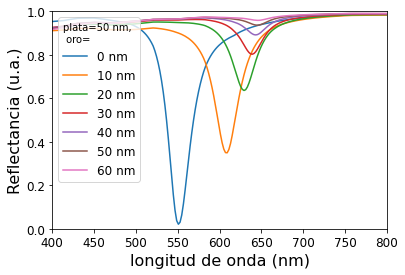

In [126]:
# Creation of an empty variable
n_entry=1.5
n_exit=1.00
theta_in_deg = 44

#reflection_p_to_p = []

epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])

e1_Au=numpy.loadtxt("e1_Au.txt")
e2_Au=numpy.loadtxt("e2_Au.txt")
e_Au=numpy.vectorize(complex)(e1_Au, e2_Au)

e1_Ag=numpy.loadtxt("e1_Ag.txt")
e2_Ag=numpy.loadtxt("e2_Ag.txt")
e_Ag=numpy.vectorize(complex)(e1_Ag, e2_Ag)




#espesor_a=numpy.array([10,20,30,40,50,60,70])
#thick_a=10
#espesor_b=numpy.array([10,20,30,40,50,60,70])
#reflection_p_to_p = []
#espesor_a=10
thick_a=50

espesor_b=numpy.arange(0,70,10)


N=1

wl=numpy.linspace(400,800,200)

# Calculation of the reflectance for each wavelength


for thick_b in espesor_b:
    reflection_p_to_p = []

    for k, wl_nm in enumerate(wl):
        theta_in_rad=theta_in_deg*numpy.pi/180
        # Calculation of the wavevector
        eps_b=numpy.array([[e_Au[k], 0, 0],
                            [0, e_Au[k], 0],
                            [0, 0, e_Au[k]]])
        eps_a=numpy.array([[e_Ag[k], 0, 0],
                            [0, e_Ag[k], 0],
                            [0, 0, e_Ag[k]]])

        k0 = 2 * numpy.pi / wl_nm
        Kx = n_entry * numpy.sin(theta_in_rad)
        Ky = 0
        Kz_entry = n_entry * numpy.cos(theta_in_rad)
        theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
        Kz_exit = n_exit * numpy.cos(theta_out_rad)
        Kz = n_entry * numpy.cos(theta_in_rad)

        # Creation of the entry and exit half-spaces and of the two layers
        entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
        exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
        layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
        layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

        # Creation of the periodic stack
        my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
        my_stack_structure.add_layers([layer_a, layer_b])
        my_stack_structure.N_periods = N

        # Calculation of the reflectance and storage
        J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
        reflection_p_to_p.append(J_refl_lin[0, 0])
    #reflection=reflection_p_to_p/max(reflection_p_to_p)
    #minimo=min(reflection_p_to_p)
    #angulo=theta_in_deg_list[reflection_p_to_p.index(minimo)]
    #listaa.append(minimo)
    #lista.append(angulo)

    # Plotting
    plt.plot(wl, reflection_p_to_p, label='{} nm'.format(thick_b))
    plt.ylabel('Reflectancia (u.a.)',fontsize=16)
    plt.xlabel('longitud de onda (nm)',fontsize=16)
    plt.ylim(0,1)
    plt.xlim(400,800)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12, title="plata=50 nm, \n oro=",loc=2)
    plt.savefig("multicapa_iesp_plata_50nm_theta44.jpg",dpi=300)

## Plata sobre oro diferentes índices de refracción

C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/861001015.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/861001015.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/861001015.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/861001015.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/861001015.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipyker

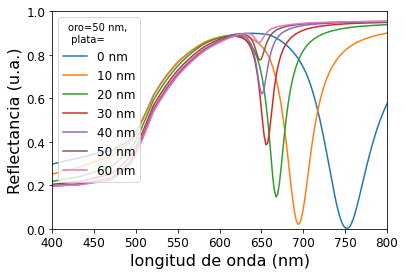

In [112]:
# Creation of an empty variable
n_entry=1.5
n_exit=1.005
theta_in_deg = 43.5

#reflection_p_to_p = []

epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])

e1_Au=numpy.loadtxt("e1_Au.txt")
e2_Au=numpy.loadtxt("e2_Au.txt")
e_Au=numpy.vectorize(complex)(e1_Au, e2_Au)

e1_Ag=numpy.loadtxt("e1_Ag.txt")
e2_Ag=numpy.loadtxt("e2_Ag.txt")
e_Ag=numpy.vectorize(complex)(e1_Ag, e2_Ag)




#espesor_a=numpy.array([10,20,30,40,50,60,70])
#thick_a=10
#espesor_b=numpy.array([10,20,30,40,50,60,70])
#reflection_p_to_p = []
#espesor_a=10
thick_a=50

espesor_b=numpy.arange(0,70,10)


N=1

wl=numpy.linspace(400,800,200)

# Calculation of the reflectance for each wavelength


for thick_b in espesor_b:
    reflection_p_to_p = []

    for k, wl_nm in enumerate(wl):
        theta_in_rad=theta_in_deg*numpy.pi/180
        # Calculation of the wavevector
        eps_a=numpy.array([[e_Au[k], 0, 0],
                            [0, e_Au[k], 0],
                            [0, 0, e_Au[k]]])
        eps_b=numpy.array([[e_Ag[k], 0, 0],
                            [0, e_Ag[k], 0],
                            [0, 0, e_Ag[k]]])

        k0 = 2 * numpy.pi / wl_nm
        Kx = n_entry * numpy.sin(theta_in_rad)
        Ky = 0
        Kz_entry = n_entry * numpy.cos(theta_in_rad)
        theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
        Kz_exit = n_exit * numpy.cos(theta_out_rad)
        Kz = n_entry * numpy.cos(theta_in_rad)

        # Creation of the entry and exit half-spaces and of the two layers
        entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
        exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
        layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
        layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

        # Creation of the periodic stack
        my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
        my_stack_structure.add_layers([layer_a, layer_b])
        my_stack_structure.N_periods = N

        # Calculation of the reflectance and storage
        J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
        reflection_p_to_p.append(J_refl_lin[0, 0])
    #reflection=reflection_p_to_p/max(reflection_p_to_p)
    #minimo=min(reflection_p_to_p)
    #angulo=theta_in_deg_list[reflection_p_to_p.index(minimo)]
    #listaa.append(minimo)
    #lista.append(angulo)

    # Plotting
    plt.plot(wl, reflection_p_to_p, label='{} nm'.format(thick_b))
    plt.ylabel('Reflectancia (u.a.)',fontsize=16)
    plt.xlabel('longitud de onda (nm)',fontsize=16)
    plt.ylim(0,1)
    plt.xlim(400,800)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12, title="oro=50 nm, \n plata=",loc=2)
    plt.savefig("multicapa_iesp_oro_50nm_102.jpg",dpi=300)

## Oro sobre plata diferentes índices de refracción

C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/556255306.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/556255306.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/556255306.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/556255306.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_17092/556255306.py:60: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipyker

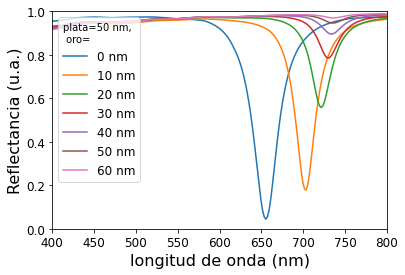

In [113]:
# Creation of an empty variable
n_entry=1.5
n_exit=1.005
theta_in_deg = 43.5

#reflection_p_to_p = []

epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])

e1_Au=numpy.loadtxt("e1_Au.txt")
e2_Au=numpy.loadtxt("e2_Au.txt")
e_Au=numpy.vectorize(complex)(e1_Au, e2_Au)

e1_Ag=numpy.loadtxt("e1_Ag.txt")
e2_Ag=numpy.loadtxt("e2_Ag.txt")
e_Ag=numpy.vectorize(complex)(e1_Ag, e2_Ag)




#espesor_a=numpy.array([10,20,30,40,50,60,70])
#thick_a=10
#espesor_b=numpy.array([10,20,30,40,50,60,70])
#reflection_p_to_p = []
#espesor_a=10
thick_a=50

espesor_b=numpy.arange(0,70,10)


N=1

wl=numpy.linspace(400,800,200)

# Calculation of the reflectance for each wavelength


for thick_b in espesor_b:
    reflection_p_to_p = []

    for k, wl_nm in enumerate(wl):
        theta_in_rad=theta_in_deg*numpy.pi/180
        # Calculation of the wavevector
        eps_b=numpy.array([[e_Au[k], 0, 0],
                            [0, e_Au[k], 0],
                            [0, 0, e_Au[k]]])
        eps_a=numpy.array([[e_Ag[k], 0, 0],
                            [0, e_Ag[k], 0],
                            [0, 0, e_Ag[k]]])

        k0 = 2 * numpy.pi / wl_nm
        Kx = n_entry * numpy.sin(theta_in_rad)
        Ky = 0
        Kz_entry = n_entry * numpy.cos(theta_in_rad)
        theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
        Kz_exit = n_exit * numpy.cos(theta_out_rad)
        Kz = n_entry * numpy.cos(theta_in_rad)

        # Creation of the entry and exit half-spaces and of the two layers
        entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
        exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
        layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
        layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

        # Creation of the periodic stack
        my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
        my_stack_structure.add_layers([layer_a, layer_b])
        my_stack_structure.N_periods = N

        # Calculation of the reflectance and storage
        J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
        reflection_p_to_p.append(J_refl_lin[0, 0])
    #reflection=reflection_p_to_p/max(reflection_p_to_p)
    #minimo=min(reflection_p_to_p)
    #angulo=theta_in_deg_list[reflection_p_to_p.index(minimo)]
    #listaa.append(minimo)
    #lista.append(angulo)

    # Plotting
    plt.plot(wl, reflection_p_to_p, label='{} nm'.format(thick_b))
    plt.ylabel('Reflectancia (u.a.)',fontsize=16)
    plt.xlabel('longitud de onda (nm)',fontsize=16)
    plt.ylim(0,1)
    plt.xlim(400,800)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12, title="plata=50 nm, \n oro=",loc=2)
    plt.savefig("multicapa_iesp_plata_50nm_1005.jpg",dpi=300)

C:\Users\alfre\AppData\Local\Temp/ipykernel_16528/2393032709.py:67: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_16528/2393032709.py:67: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_16528/2393032709.py:67: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_16528/2393032709.py:67: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/ipykernel_16528/2393032709.py:67: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
C:\Users\alfre\AppData\Local\Temp/i

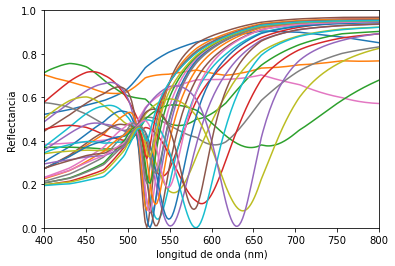

In [37]:
# Creation of an empty variable
n_entry=1.5
n_exit=1.01
theta_in_deg = 45

#reflection_p_to_p = []

epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])

e1_Au=numpy.loadtxt("e1_Au.txt")
e2_Au=numpy.loadtxt("e2_Au.txt")
e_Au=numpy.vectorize(complex)(e1_Au, e2_Au)

e1_Ag=numpy.loadtxt("e1_Ag.txt")
e2_Ag=numpy.loadtxt("e2_Ag.txt")
e_Ag=numpy.vectorize(complex)(e1_Ag, e2_Ag)




#espesor_a=numpy.array([10,20,30,40,50,60,70])
#thick_a=10
#espesor_b=numpy.array([10,20,30,40,50,60,70])
#reflection_p_to_p = []
espesor_a=numpy.arange(10,60,10)
#thick_a=10
espesor_b=numpy.arange(0,60,10)


N=1

wl=numpy.linspace(400,800,200)

# Calculation of the reflectance for each wavelength

min_ang=[]
minimo_int=[]
for thick_a in espesor_a:
    
    
    lista=[]
    listaa=[]
    min_ang.append(lista)
    minimo_int.append(listaa)
    for thick_b in espesor_b:
        reflection_p_to_p = []

        for k, wl_nm in enumerate(wl):
            theta_in_rad=theta_in_deg*numpy.pi/180
            # Calculation of the wavevector
            eps_a=numpy.array([[e_Au[k], 0, 0],
                               [0, e_Au[k], 0],
                               [0, 0, e_Au[k]]])
            eps_b=numpy.array([[e_Ag[k], 0, 0],
                               [0, e_Ag[k], 0],
                               [0, 0, e_Ag[k]]])

            k0 = 2 * numpy.pi / wl_nm
            Kx = n_entry * numpy.sin(theta_in_rad)
            Ky = 0
            Kz_entry = n_entry * numpy.cos(theta_in_rad)
            theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
            Kz_exit = n_exit * numpy.cos(theta_out_rad)
            Kz = n_entry * numpy.cos(theta_in_rad)

            # Creation of the entry and exit half-spaces and of the two layers
            entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
            exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
            layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
            layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

            # Creation of the periodic stack
            my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
            my_stack_structure.add_layers([layer_a, layer_b])
            my_stack_structure.N_periods = N

            # Calculation of the reflectance and storage
            J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
            reflection_p_to_p.append(J_refl_lin[0, 0])
        #reflection=reflection_p_to_p/max(reflection_p_to_p)
        #minimo=min(reflection_p_to_p)
        #angulo=theta_in_deg_list[reflection_p_to_p.index(minimo)]
        #listaa.append(minimo)
        #lista.append(angulo)

        # Plotting
        plt.plot(wl, reflection_p_to_p)
        plt.ylabel('Reflectancia')
        plt.xlabel('longitud de onda (nm)')
        plt.ylim(0,1)
        plt.xlim(400,800)
        #plt.xticks(numpy.arange(42, 47.5, step=1.0))
        #plt.legend(title="multicapa plata sobre oro \n espesor plata-espesor oro")
        #plt.savefig("multicapa_oro70nm.jpg",dpi=300)

In [4]:
e_Au[k]

(-52.47168671875+4.033546875j)

C:\Users\alfre\AppData\Local\Temp/ipykernel_16528/2676500055.py:32: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))


Text(0.5, 0, 'wavelength (°)')

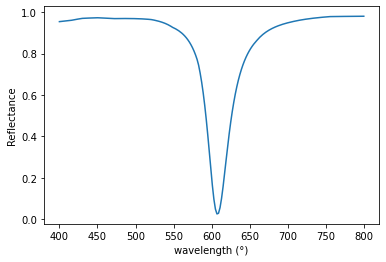

In [42]:
n_entry=1.5
n_exit=1.00
theta_in_deg=43.5
wl = numpy.linspace(400,800,200)

e1_Ag=numpy.loadtxt("e1_Ag.txt")
e2_Ag=numpy.loadtxt("e2_Ag.txt")
e_Ag=numpy.vectorize(complex)(e1_Ag, e2_Ag)


epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])

thickness_nm=50
reflection_p_to_p = []

for k, wl_nm in enumerate (wl):
        # Calculation of the wavevector
    epsilon = numpy.array([[e_Ag[k], 0, 0],
                           [0, e_Ag[k], 0],
                           [0, 0, e_Ag[k]]])
    
    theta_in_rad=theta_in_deg*numpy.pi/180
    k0 = 2 * numpy.pi / wl_nm
    Kx = n_entry * numpy.sin(theta_in_rad)
    Ky = 0
    Kz_entry = n_entry * numpy.cos(theta_in_rad)
    theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
    Kz_exit = n_exit * numpy.cos(theta_out_rad)
    Kz = n_entry * numpy.cos(theta_in_rad)
    

        # Creation of the entry and exit half-spaces and of the two layers
    entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
    exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
    my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
    my_layer = pyllama.Layer(epsilon, thickness_nm, Kx, k0)
    my_stack_structure.add_layer(my_layer)

        # Calculation of the reflectance and storage
    J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
    reflection_p_to_p.append(J_refl_lin[0, 0])

    # Plotting
plt.plot(wl, reflection_p_to_p)
plt.ylabel('Reflectance')
plt.xlabel('wavelength (°)')
#plt.ylim(0,1)
#plt.xlim(400,800)


In [3]:
# Data de Johnson y Christy para plata y oro interpolada (200 datos)

In [4]:
# Longitud de onda interpolada

In [ ]:
# Creation of an empty variable
n_entry=1.5
n_exit=1.00
theta_in_deg_list = numpy.linspace(42,50,200)
#reflection_p_to_p = []
epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])



eps_a=numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])


eps_b=numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])

#espesor_a=numpy.array([10,20,30,40,50,60,70])
#thick_a=10
#espesor_b=numpy.array([10,20,30,40,50,60,70])
#reflection_p_to_p = []
espesor_a=numpy.arange(10,60,1)
#thick_a=10
espesor_b=numpy.arange(10,60,1)


N=1

wl_nm=633

# Calculation of the reflectance for each wavelength

min_ang=[]
minimo_int=[]
for thick_a in espesor_a:
    
    
    lista=[]
    listaa=[]
    min_ang.append(lista)
    minimo_int.append(listaa)
    for thick_b in espesor_b:
        reflection_p_to_p = []

        for theta_in_deg in theta_in_deg_list:
            theta_in_rad=theta_in_deg*numpy.pi/180
            # Calculation of the wavevector

            k0 = 2 * numpy.pi / wl_nm
            Kx = n_entry * numpy.sin(theta_in_rad)
            Ky = 0
            Kz_entry = n_entry * numpy.cos(theta_in_rad)
            theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
            Kz_exit = n_exit * numpy.cos(theta_out_rad)
            Kz = n_entry * numpy.cos(theta_in_rad)

            # Creation of the entry and exit half-spaces and of the two layers
            entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
            exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
            layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
            layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

            # Creation of the periodic stack
            my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
            my_stack_structure.add_layers([layer_a, layer_b])
            my_stack_structure.N_periods = N

            # Calculation of the reflectance and storage
            J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
            reflection_p_to_p.append(J_refl_lin[0, 0])
        #reflection=reflection_p_to_p/max(reflection_p_to_p)
        minimo=min(reflection_p_to_p)
        angulo=theta_in_deg_list[reflection_p_to_p.index(minimo)]
        listaa.append(minimo)
        lista.append(angulo)

        # Plotting
        plt.plot(theta_in_deg_list, reflection_p_to_p)
        plt.ylabel('Reflectancia Normalizada')
        plt.xlabel('ángulo (°)')
        plt.ylim(0,1)
        plt.xlim(42,47.5)
        plt.xticks(numpy.arange(42, 47.5, step=1.0))
        #plt.legend(title="multicapa plata sobre oro \n espesor plata-espesor oro")
        #plt.savefig("multicapa_oro70nm.jpg",dpi=300)

In [224]:
minimo=min(reflection_p_to_p)
angulo=theta_in_deg_list[reflection_p_to_p.index(minimo)]
angulo

44.37185929648241

In [144]:
espesor_b=[6,4,2]

In [230]:
#n_exit_arr=numpy.linspace(1.00,1.10,100)
n_exit_arr=numpy.array([1,2])
epsilon_exit = numpy.array([[n_exit_arr ** 2, 0, 0],
                            [0, n_exit_arr ** 2, 0],
                            [0, 0, n_exit_arr ** 2]])

C:\Users\alfre\AppData\Local\Temp/ipykernel_13532/656666933.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  epsilon_exit = numpy.array([[n_exit_arr ** 2, 0, 0],


In [235]:
epsilon_exit[0]

array([array([1, 4], dtype=int32), 0, 0], dtype=object)

In [63]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [149]:
hola=numpy.transpose(arr.reshape((7,13)))

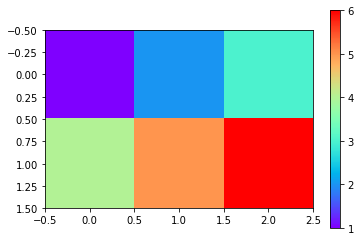

In [64]:
plt.imshow(a, interpolation='None', cmap='rainbow')
plt.colorbar()
plt.show()

In [144]:
numpy.savetxt('altura.txt', hola, delimiter=',')

# Listado de ancho plata (eje y) sobre oro (eje x)

In [159]:
x=[10,11,12,13,14,15,16,17,18,19]
y=[1,2,3,4,5,4,3,2,1,0]

In [162]:
max_y = max(y)  # Find the maximum y value
medio_x = x[y.index(max_y)]  # Find the x value corresponding to the maximum y value
print(medio_x, max_y)

14 5


In [163]:
from scipy.signal import chirp, find_peaks, peak_widths

In [169]:
x = numpy.linspace(0, numpy.pi, 100)

In [170]:
y=numpy.sin(x)

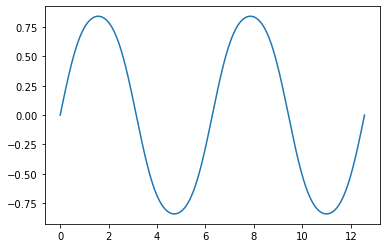

In [196]:
plt.plot(numpy.linspace(0,  4*numpy.pi, 1000),numpy.sin(x))

In [209]:
x = numpy.linspace(0, 6 * numpy.pi, 100)
x = numpy.sin(x)

In [210]:
peaks, _ = find_peaks(x)
results_half = peak_widths(x, peaks, rel_height=0.5)
results_half[0]  # widths

array([10.98620707, 16.5       , 16.5       ])

In [211]:
results_full = peak_widths(x, peaks, rel_height=1)
results_full[0]  # widths

array([16.5, 33. , 33. ])

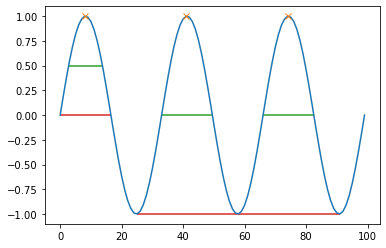

In [212]:
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.hlines(*results_half[1:], color="C2")
plt.hlines(*results_full[1:], color="C3")
plt.show()

In [ ]:
# Creation of an empty variable
n_entry=1.5
n_exit=1.00
theta_in_deg_list = numpy.linspace(40,50,200)
#reflection_p_to_p = []
epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])



eps_a=numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])


eps_b=numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])

#espesor_a=numpy.array([10,20,30,40,50,60,70])
#thick_a=10
#espesor_b=numpy.array([10,20,30,40,50,60,70])
#reflection_p_to_p = []
espesor_a=numpy.arange(10,71,10)
#thick_a=10
espesor_b=numpy.arange(10,71,5)


N=1

wl_nm=633

# Calculation of the reflectance for each wavelength

lista2=[]
for thick_a in espesor_a:
    
    
    lista=[]
    lista2.append(lista)
    for thick_b in espesor_b:
        reflection_p_to_p = []

        for theta_in_deg in theta_in_deg_list:
            theta_in_rad=theta_in_deg*numpy.pi/180
            # Calculation of the wavevector

            k0 = 2 * numpy.pi / wl_nm
            Kx = n_entry * numpy.sin(theta_in_rad)
            Ky = 0
            Kz_entry = n_entry * numpy.cos(theta_in_rad)
            theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
            Kz_exit = n_exit * numpy.cos(theta_out_rad)
            Kz = n_entry * numpy.cos(theta_in_rad)

            # Creation of the entry and exit half-spaces and of the two layers
            entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
            exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
            layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
            layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

            # Creation of the periodic stack
            my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
            my_stack_structure.add_layers([layer_a, layer_b])
            my_stack_structure.N_periods = N

            # Calculation of the reflectance and storage
            J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
            reflection_p_to_p.append(J_refl_lin[0, 0])
        reflection=reflection_p_to_p/max(reflection_p_to_p)
        altura=max(reflection_p_to_p)-min(reflection_p_to_p)
        lista.append(altura)

        # Plotting
        plt.plot(theta_in_deg_list, reflection_p_to_p)
        plt.ylabel('Reflectancia Normalizada')
        plt.xlabel('ángulo (°)')
        plt.ylim(0,1)
        plt.xlim(42,47.5)
        plt.xticks(numpy.arange(42, 47.5, step=0.5))
        plt.legend(title="oro=10 nm, \n plata=")
        plt.savefig("multicapa_oro70nm.jpg",dpi=300)

# Listado de derivada (Sensitividad) plata (eje y) sobre oro (eje x)

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_7656/1691175240.py:56: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
No handles with labels found to put in legend.
C:\Users\alfre\AppData\Local\Temp/ipykernel_

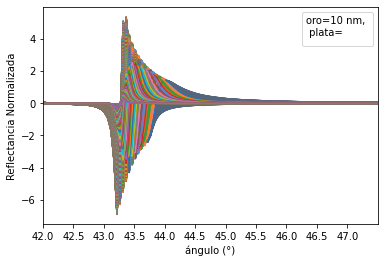

In [34]:
# Creation of an empty variable
n_entry=1.5
n_exit=1.00
theta_in_deg_list = numpy.linspace(40,50,200)
#reflection_p_to_p = []
epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])



eps_a=numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])


eps_b=numpy.array([[(-18.6378+0.474925j), 0, 0],
                   [0, (-18.6378+0.474925j), 0],
                   [0, 0, (-18.6378+0.474925j)]])

#espesor_a=numpy.array([10,20,30,40,50,60,70])
#thick_a=10
#espesor_b=numpy.array([10,20,30,40,50,60,70])
#reflection_p_to_p = []
espesor_a=numpy.arange(5,60,1)
#thick_a=10
espesor_b=numpy.arange(5,60,1)


N=1

wl_nm=633

# Calculation of the reflectance for each wavelength

lista_sen=[]
for thick_a in espesor_a:
    
    
    sensitivity=[]
    lista_sen.append(sensitivity)
    for thick_b in espesor_b:
        reflection_p_to_p = []

        for theta_in_deg in theta_in_deg_list:
            theta_in_rad=theta_in_deg*numpy.pi/180
            # Calculation of the wavevector

            k0 = 2 * numpy.pi / wl_nm
            Kx = n_entry * numpy.sin(theta_in_rad)
            Ky = 0
            Kz_entry = n_entry * numpy.cos(theta_in_rad)
            theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
            Kz_exit = n_exit * numpy.cos(theta_out_rad)
            Kz = n_entry * numpy.cos(theta_in_rad)

            # Creation of the entry and exit half-spaces and of the two layers
            entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
            exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
            layer_a = pyllama.Layer(eps_a, thick_a, Kx, k0)
            layer_b = pyllama.Layer(eps_b, thick_b, Kx, k0)

            # Creation of the periodic stack
            my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
            my_stack_structure.add_layers([layer_a, layer_b])
            my_stack_structure.N_periods = N

            # Calculation of the reflectance and storage
            J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
            reflection_p_to_p.append(J_refl_lin[0, 0])
        
        derivada=numpy.gradient(reflection_p_to_p,theta_in_deg_list)
        maxdev=min(derivada)
        sensitivity.append(maxdev)

        # Plotting
        plt.plot(theta_in_deg_list, derivada)
        plt.ylabel('Reflectancia Normalizada')
        plt.xlabel('ángulo (°)')
        #plt.ylim(0,1)
        plt.xlim(42,47.5)
        plt.xticks(numpy.arange(42, 47.5, step=0.5))
        plt.legend(title="oro=10 nm, \n plata=")
        plt.savefig("multicapa_oro70nm.jpg",dpi=300)

In [35]:
arr2=numpy.array([lista_sen])

In [36]:
arr2.shape

(1, 55, 55)

In [37]:
hola_2=numpy.transpose(arr2.reshape(55,55))

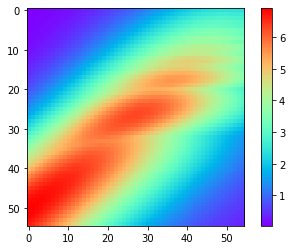

In [38]:
plt.imshow(hola_2*(-1), interpolation='None', cmap='rainbow')
plt.colorbar()
plt.show()

In [39]:
numpy.savetxt('sensitividad.txt', hola_2, delimiter=',')

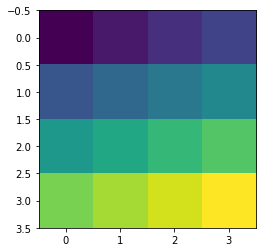

In [28]:
H = numpy.array([[1, 2, 3, 4],
          [5, 6, 7, 8],
          [9, 10, 11, 12],
          [13, 14, 15, 16]])

plt.imshow(H, interpolation='none')
plt.show()

In [100]:
numpy.arange(10,70,1)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69])

C:\Users\alfre\AppData\Local\Temp/ipykernel_6128/2818354218.py:25: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))


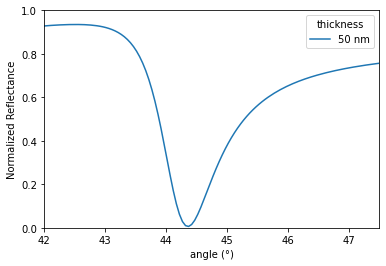

In [28]:
n_entry=1.5
n_exit=1.00
theta_in_deg_list = numpy.linspace(40,50,200)
epsilon = numpy.array([[(-11.6628+1.26957j), 0, 0],
                   [0, (-11.6628+1.26957j), 0],
                   [0, 0, (-11.6628+1.26957j)]])
epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])

reflection_p_to_p = []
wl_nm=633
thickness_nm=50

for theta_in_deg in theta_in_deg_list:
        # Calculation of the wavevector
    theta_in_rad=theta_in_deg*numpy.pi/180
    k0 = 2 * numpy.pi / wl_nm
    Kx = n_entry * numpy.sin(theta_in_rad)
    Ky = 0
    Kz_entry = n_entry * numpy.cos(theta_in_rad)
    theta_out_rad = numpy.arcsin((n_entry/n_exit)*numpy.sin(theta_in_rad))
    Kz_exit = n_exit * numpy.cos(theta_out_rad)
    Kz = n_entry * numpy.cos(theta_in_rad)
    

        # Creation of the entry and exit half-spaces and of the two layers
    entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
    exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
    my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
    my_layer = pyllama.Layer(epsilon, thickness_nm, Kx, k0)
    my_stack_structure.add_layer(my_layer)

        # Calculation of the reflectance and storage
    J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
    reflection_p_to_p.append(J_refl_lin[0, 0])
    reflection=reflection_p_to_p/max(reflection_p_to_p)
    # Plotting
plt.plot(theta_in_deg_list, reflection_p_to_p, label='{} nm'.format(thickness_nm))
plt.ylabel('Normalized Reflectance')
plt.xlabel('angle (°)')
plt.ylim(0,1)
plt.xlim(42,47.5)
#plt.xticks(numpy.arange(40, 51, step=1))
#plt.xticks(numpy.arange(43, 47, step=0.5))
plt.legend(title="thickness")
plt.savefig("espesores.jpg",dpi=300)

In [26]:
numpy.where( reflection_p_to_p == numpy.amin(reflection_p_to_p))

(array([87], dtype=int64),)

In [27]:
theta_in_deg_list[87]

44.37185929648241

In [54]:
data=numpy.loadtxt("Johnson_Au.txt")

In [92]:
n=data[:,1]
k=data[:,2]
e1=n**2 - k**2
e2=2*n*k
n_entry=1.5
n_exit=1

epsilon = numpy.array([[(e1+1j*e2), 0, 0],
                   [0, (e1+1j*e2), 0],
                   [0, 0, (e1+1j*e2)]])
epsilon_exit = numpy.array([[n_exit ** 2, 0, 0],
                            [0, n_exit ** 2, 0],
                            [0, 0, n_exit ** 2]])
epsilon_entry = numpy.array([[n_entry ** 2, 0, 0],
                             [0, n_entry ** 2, 0],
                             [0, 0, n_entry ** 2]])

theta_in_rad=numpy.pi/4

thickness_nm=50

# Creation of an empty variable
reflection_p_to_p = []

# Creation of the wavelengths
wl_nm_list=1000*data[:,0]

# Calculation of the reflectance for each wavelength
for wl_nm in wl_nm_list:
    theta_in_rad=theta_in_deg*numpy.pi/180
    # Calculation of the wavevector
    k0 = 2 * numpy.pi / wl_nm
    Kx = n_entry * numpy.sin(theta_in_rad)
    Ky = 0
    Kz_entry = n_entry * numpy.cos(theta_in_rad)
    theta_out_rad = numpy.arcsin((n_entry / n_exit) * numpy.sin(theta_in_rad))
    Kz_exit = n_exit * numpy.cos(theta_out_rad)

    # Creation of the entry and exit half-spaces and of the two layers
    entry = pyllama.HalfSpace(epsilon_entry, Kx, Kz_entry, k0)
    exit = pyllama.HalfSpace(epsilon_exit, Kx, Kz_exit, k0)
    my_stack_structure = pyllama.Structure(entry, exit, Kx, Ky, Kz_entry, Kz_exit, k0)
    my_layer = pyllama.Layer(epsilon, thickness_nm, Kx, k0)
    my_stack_structure.add_layer(my_layer)

    # Creation of the periodic stack
    J_refl_lin, _ = my_stack_structure.get_refl_trans(circ=False, method="TM")
    reflection_p_to_p.append(J_refl_lin[0, 0])

    # Calculation of the reflectance and storage

# Plotting
plt.plot(wl_nm_list, reflection_p_to_p)

C:\Users\alfre\AppData\Local\Temp/ipykernel_19012/1782267181.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  epsilon = numpy.array([[(e1+1j*e2), 0, 0],
C:\Users\alfre\AppData\Local\Temp/ipykernel_19012/1782267181.py:35: RuntimeWarning: invalid value encountered in arcsin
  theta_out_rad = numpy.arcsin((n_entry / n_exit) * numpy.sin(theta_in_rad))


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [107]:
epsilon[0][0]


array([ 2.2705600e-01 +3.04128j,  2.9519100e-01 +3.17592j,
        2.9252400e-01 +3.28568j,  2.0389900e-01 +3.32766j,
        1.3817100e-01 +3.39682j, -1.0416000e-02 +3.3904j ,
       -1.3250000e-01 +3.51j   , -2.3376900e-01 +3.6062j ,
       -3.4632900e-01 +3.7102j , -4.1550000e-01 +3.8252j ,
       -5.5100900e-01 +3.8922j , -6.1689600e-01 +4.05504j,
       -7.4452900e-01 +4.16328j, -8.9126100e-01 +4.33846j,
       -1.0804440e+00 +4.49008j, -1.2365010e+00 +4.7223j ,
       -1.3464090e+00 +4.97628j, -1.3665090e+00 +5.28242j,
       -1.3322610e+00 +5.49486j, -1.3067840e+00 +5.59644j,
       -1.2274210e+00 +5.78034j, -1.2425490e+00 +5.79258j,
       -1.2308040e+00 +5.84584j, -1.3552890e+00 +5.57368j,
       -1.3102410e+00 +5.53816j, -1.2319560e+00 +5.598j  ,
       -1.4006250e+00 +5.6092j , -1.6048890e+00 +5.64436j,
       -1.6494040e+00 +5.73888j, -1.7021640e+00 +5.71736j,
       -1.6922040e+00 +5.6492j , -1.7589960e+00 +5.28264j,
       -1.7027010e+00 +4.84438j, -2.2782890e+00 +3.81264

In [105]:
epsilon

array([[array([ 2.2705600e-01 +3.04128j,  2.9519100e-01 +3.17592j,
                2.9252400e-01 +3.28568j,  2.0389900e-01 +3.32766j,
                1.3817100e-01 +3.39682j, -1.0416000e-02 +3.3904j ,
               -1.3250000e-01 +3.51j   , -2.3376900e-01 +3.6062j ,
               -3.4632900e-01 +3.7102j , -4.1550000e-01 +3.8252j ,
               -5.5100900e-01 +3.8922j , -6.1689600e-01 +4.05504j,
               -7.4452900e-01 +4.16328j, -8.9126100e-01 +4.33846j,
               -1.0804440e+00 +4.49008j, -1.2365010e+00 +4.7223j ,
               -1.3464090e+00 +4.97628j, -1.3665090e+00 +5.28242j,
               -1.3322610e+00 +5.49486j, -1.3067840e+00 +5.59644j,
               -1.2274210e+00 +5.78034j, -1.2425490e+00 +5.79258j,
               -1.2308040e+00 +5.84584j, -1.3552890e+00 +5.57368j,
               -1.3102410e+00 +5.53816j, -1.2319560e+00 +5.598j  ,
               -1.4006250e+00 +5.6092j , -1.6048890e+00 +5.64436j,
               -1.6494040e+00 +5.73888j, -1.7021640e+00 +5.717

In [53]:
n=data[:,1]
k=data[:,2]
e1=n**2 - k**2
e2=2*n*k
eps=e1+1j*e2
eps

array([ 2.2705600e-01 +3.04128j,  2.9519100e-01 +3.17592j,
        2.9252400e-01 +3.28568j,  2.0389900e-01 +3.32766j,
        1.3817100e-01 +3.39682j, -1.0416000e-02 +3.3904j ,
       -1.3250000e-01 +3.51j   , -2.3376900e-01 +3.6062j ,
       -3.4632900e-01 +3.7102j , -4.1550000e-01 +3.8252j ,
       -5.5100900e-01 +3.8922j , -6.1689600e-01 +4.05504j,
       -7.4452900e-01 +4.16328j, -8.9126100e-01 +4.33846j,
       -1.0804440e+00 +4.49008j, -1.2365010e+00 +4.7223j ,
       -1.3464090e+00 +4.97628j, -1.3665090e+00 +5.28242j,
       -1.3322610e+00 +5.49486j, -1.3067840e+00 +5.59644j,
       -1.2274210e+00 +5.78034j, -1.2425490e+00 +5.79258j,
       -1.2308040e+00 +5.84584j, -1.3552890e+00 +5.57368j,
       -1.3102410e+00 +5.53816j, -1.2319560e+00 +5.598j  ,
       -1.4006250e+00 +5.6092j , -1.6048890e+00 +5.64436j,
       -1.6494040e+00 +5.73888j, -1.7021640e+00 +5.71736j,
       -1.6922040e+00 +5.6492j , -1.7589960e+00 +5.28264j,
       -1.7027010e+00 +4.84438j, -2.2782890e+00 +3.81264

In [34]:
e1

array([ 2.2705600e-01,  2.9519100e-01,  2.9252400e-01,  2.0389900e-01,
        1.3817100e-01, -1.0416000e-02, -1.3250000e-01, -2.3376900e-01,
       -3.4632900e-01, -4.1550000e-01, -5.5100900e-01, -6.1689600e-01,
       -7.4452900e-01, -8.9126100e-01, -1.0804440e+00, -1.2365010e+00,
       -1.3464090e+00, -1.3665090e+00, -1.3322610e+00, -1.3067840e+00,
       -1.2274210e+00, -1.2425490e+00, -1.2308040e+00, -1.3552890e+00,
       -1.3102410e+00, -1.2319560e+00, -1.4006250e+00, -1.6048890e+00,
       -1.6494040e+00, -1.7021640e+00, -1.6922040e+00, -1.7589960e+00,
       -1.7027010e+00, -2.2782890e+00, -3.9461610e+00, -5.8421250e+00,
       -8.1126690e+00, -1.0661884e+01, -1.3648209e+01, -1.6817709e+01,
       -2.0610164e+01, -2.5811289e+01, -3.2040669e+01, -4.0274100e+01,
       -5.1049600e+01, -6.6218525e+01, -9.0426461e+01, -1.2535050e+02,
       -1.8904200e+02])

In [36]:
e2

array([ 3.04128+0.j,  3.17592+0.j,  3.28568+0.j,  3.32766+0.j,
        3.39682+0.j,  3.3904 +0.j,  3.51   +0.j,  3.6062 +0.j,
        3.7102 +0.j,  3.8252 +0.j,  3.8922 +0.j,  4.05504+0.j,
        4.16328+0.j,  4.33846+0.j,  4.49008+0.j,  4.7223 +0.j,
        4.97628+0.j,  5.28242+0.j,  5.49486+0.j,  5.59644+0.j,
        5.78034+0.j,  5.79258+0.j,  5.84584+0.j,  5.57368+0.j,
        5.53816+0.j,  5.598  +0.j,  5.6092 +0.j,  5.64436+0.j,
        5.73888+0.j,  5.71736+0.j,  5.6492 +0.j,  5.28264+0.j,
        4.84438+0.j,  3.81264+0.j,  2.58044+0.j,  2.1113 +0.j,
        1.66054+0.j,  1.37424+0.j,  1.03516+0.j,  1.06678+0.j,
        1.27176+0.j,  1.62656+0.j,  1.92542+0.j,  2.794  +0.j,
        3.861  +0.j,  5.7015 +0.j,  8.18634+0.j, 12.5552 +0.j,
       25.3552 +0.j])